In [400]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud,STOPWORDS
stopwords = set(STOPWORDS)

from textblob import TextBlob

import re

from collections import Counter

import warnings
warnings.filterwarnings("ignore")

import os

In [401]:
 #Reading data
df=pd.read_csv(r'C:\Users\DELL\Desktop\mask covid19\mask dataset\INDIA MASKTWEETS.csv',header=None,names=["created_at","text","screen_name","location"])
#np.random.seed(0))
df.head()

,created_at,text,screen_name,location
0,19-09-2021 06:25,b'#Loot\nGet Pharmeasy Plus 3 Months Membershi...,b'on9deals',"b'Mumbai, India'"
1,19-09-2021 04:45,"b'@traffic_jpr Is face mask still mandatory, i...",b'mrinaljaipur',"b'Jaipur, India'"
2,19-09-2021 04:22,b'Don\xe2\x80\x99t let your guard down. The #C...,b'MayaSharmaNDTV',"b'Bengaluru, India'"
3,18-09-2021 12:45,"b'By using Mask and Getting Vaccinated, you un...",b'DoITCRaj',"b'Jaipur, India'"
4,18-09-2021 08:28,"b'On an average , 4 out of 10 people I see ins...",b'sajanjohn',"b'Bengaluru, India'"


In [402]:
df.columns
tweet=df.copy()

In [403]:
tweet.shape

(4399, 4)

In [404]:
#check missing values
tweet.isna().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of       created_at   text  screen_name  location
0          False  False        False     False
1          False  False        False     False
2          False  False        False     False
3          False  False        False     False
4          False  False        False     False
...          ...    ...          ...       ...
4394       False  False        False     False
4395       False  False        False     False
4396       False  False        False     False
4397       False  False        False     False
4398       False  False        False     False

[4399 rows x 4 columns]>

In [405]:
# data preprocessing
for i in range(tweet.shape[0]) :
    tweet['text'][i] = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|(#[A-Za-z0-9]+)", " ", tweet['text'][i]).split()).lower()
tweet['text'].head()

0    b loot nget pharmeasy plus 3 months membership...
1    b jpr is face mask still mandatory in private ...
2    b don xe2 x80 x99t let your guard down the cov...
3    b by using mask and getting vaccinated you unl...
4    b on an average 4 out of 10 people i see insid...
Name: text, dtype: object

In [407]:
#some more preprocessing deletion X..../b 
for i in range(tweet.shape[0]) :
    tweet['text'][i] = ' '.join(re.sub("(x[A-Za-z0-9])|([0-9])|(b[' '])", " ", tweet['text'][i]).split()).lower()
tweet['text'].head()

0    loot nget pharmeasy plus months membership at ...
1    jpr is face mask still mandatory in private ca...
2    don t let your guard down the covid third wave...
3    by using mask and getting vaccinated you unloc...
4    on an average out of people i see inside a hos...
Name: text, dtype: object

In [408]:
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

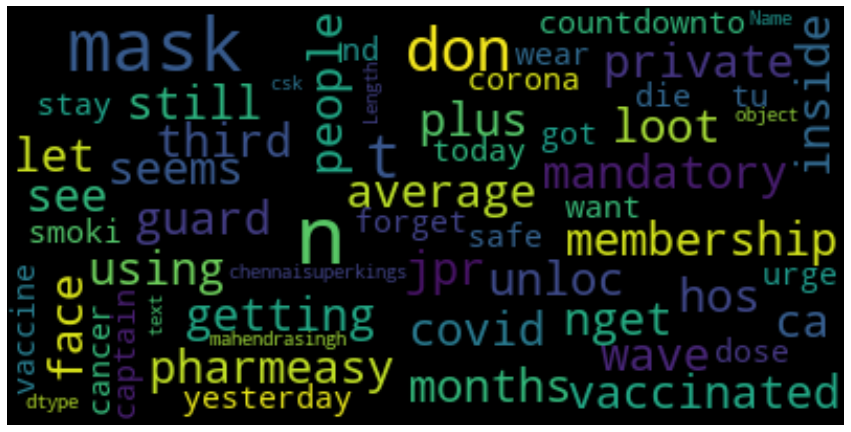

In [409]:
#wordcloud without removing stopwords
def show_wordcloud(data , title = None):
    wordcloud = WordCloud(background_color='black',stopwords=stopwords,max_words=200,max_font_size=40).generate(str(data))
  
    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    plt.title(title, size = 25)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

show_wordcloud(tweet['text'])

In [410]:
#Removing Stop Words
tweet['text'] = tweet['text'].apply(lambda tweets: ' '.join([word for word in tweets.split() if word not in stopwords]))
tweet['text'].head() 

0    loot nget pharmeasy plus months membership re ...
1    jpr face mask still mandatory private car full...
2    don t let guard covid third wave e ected make ...
3    using mask getting vaccinated unlock chances g...
4    average people see inside hospital public plac...
Name: text, dtype: object

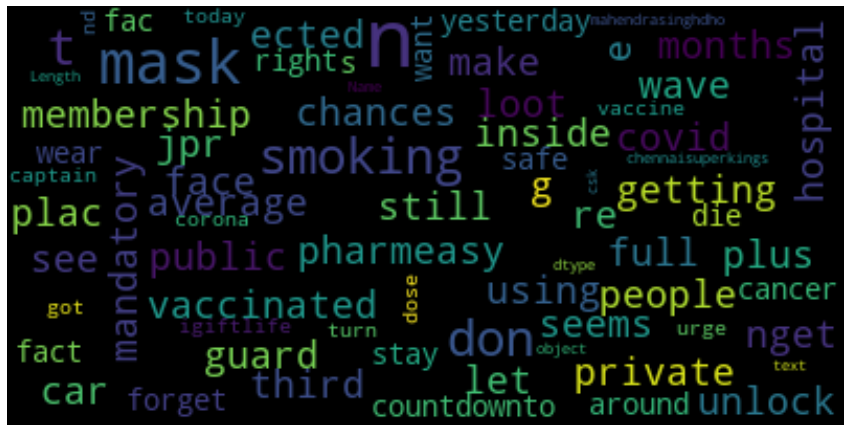

In [411]:
def show_wordcloud(data , title = None):
    wordcloud = WordCloud(background_color='black',stopwords=stopwords,max_words=200,max_font_size=40).generate(str(data))
  
    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    plt.title(title, size = 25)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

show_wordcloud(tweet['text'])

In [413]:
tweet['sentiment'] = ' '
tweet['polarity'] = None
for i,tweets in enumerate(tweet.text) :
    blob = TextBlob(tweets)
    tweet['polarity'][i] = blob.sentiment.polarity
    if blob.sentiment.polarity > 0 :
        tweet['sentiment'][i] = 'positive'
    elif blob.sentiment.polarity < 0 :
        tweet['sentiment'][i] = 'negative'
    else :
        tweet['sentiment'][i] = 'neutral'
tweet.head()

,created_at,text,screen_name,location,sentiment,polarity
0,19-09-2021 06:25,loot nget pharmeasy plus months membership re ...,b'on9deals',"b'Mumbai, India'",neutral,0.0
1,19-09-2021 04:45,jpr face mask still mandatory private car full...,b'mrinaljaipur',"b'Jaipur, India'",neutral,0.0
2,19-09-2021 04:22,don t let guard covid third wave e ected make ...,b'MayaSharmaNDTV',"b'Bengaluru, India'",neutral,0.0
3,18-09-2021 12:45,using mask getting vaccinated unlock chances g...,b'DoITCRaj',"b'Jaipur, India'",positive,0.45
4,18-09-2021 08:28,average people see inside hospital public plac...,b'sajanjohn',"b'Bengaluru, India'",negative,-0.075


In [414]:
tweet['sentiment'].value_counts()

neutral     2886
positive    1159
negative     354
Name: sentiment, dtype: int64

In [573]:
sentiment_df = pd.DataFrame(tweet, columns=[ "text","polarity","sentiment"])

sentiment_df.head(10)
sentiment_df.to_csv(r"C:\Users\DELL\Desktop\mask covid19\mask dataset/indiatweet with text pol sent.csv")

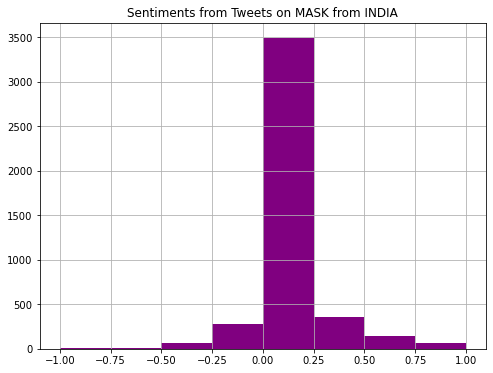

In [417]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram with break at zero
tweet['polarity'].hist(bins=[-1, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="purple")

plt.title("Sentiments from Tweets on MASK from INDIA")
plt.show()

In [418]:
#feature extraction(only feature)
y=tweet['sentiment'].values
y.shape

(4399,)

In [419]:
x=tweet['text'].values
x.shape

(4399,)

In [420]:
from sklearn.model_selection import train_test_split

In [421]:
(x_train,x_test,y_train,y_test)=train_test_split(x,y,test_size=0.5)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
y_test.shape

(2199,)
(2199,)
(2200,)


(2200,)

neutral     2886
positive    1159
negative     354
Name: sentiment, dtype: int64


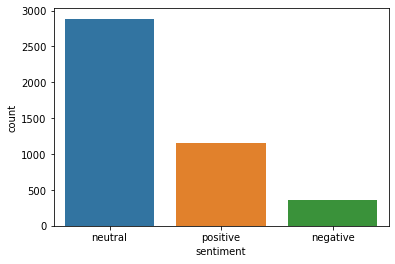

In [422]:
print(tweet.sentiment.value_counts())
sns.countplot(x='sentiment', data = tweet);

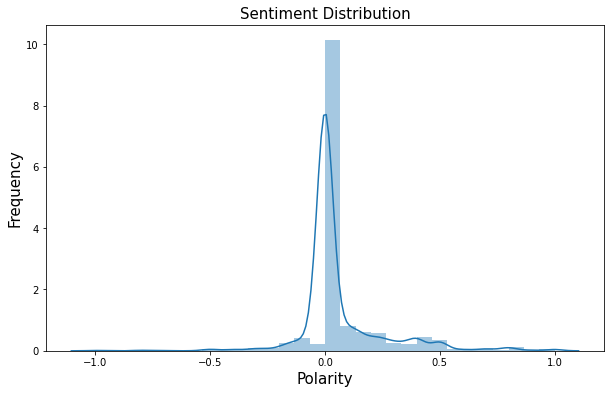

In [423]:
plt.figure(figsize=(10,6))
sns.distplot(tweet['polarity'], bins=30)
plt.title('Sentiment Distribution',size = 15)
plt.xlabel('Polarity',size = 15)
plt.ylabel('Frequency',size = 15)
plt.show();

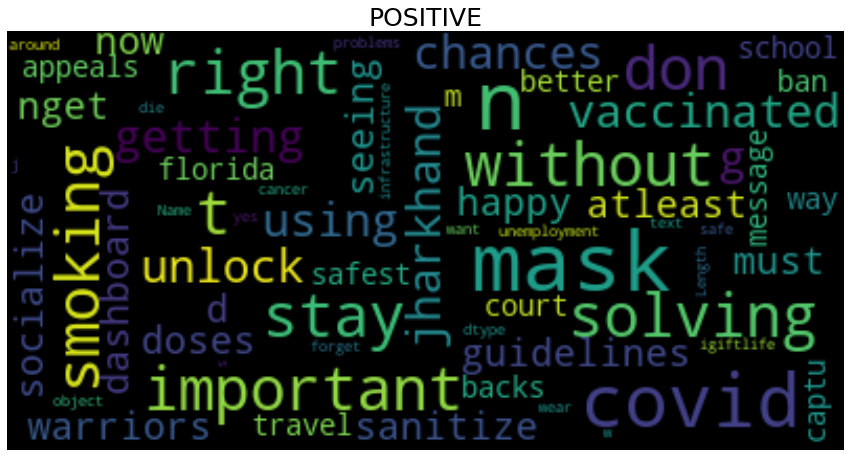

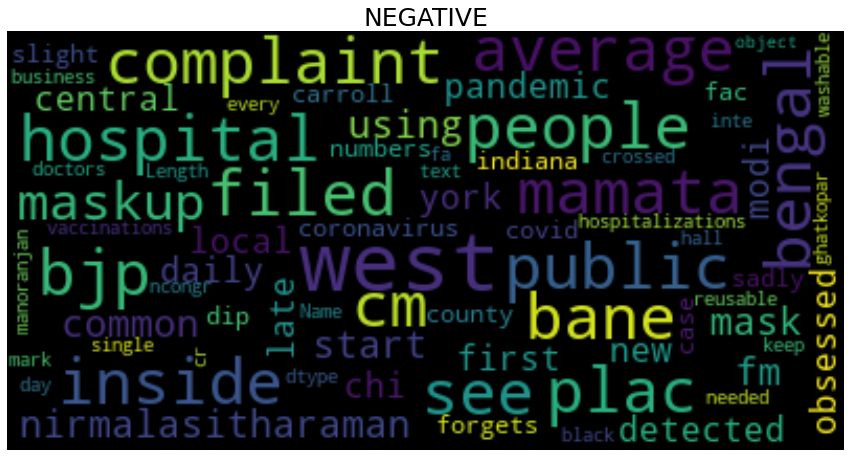

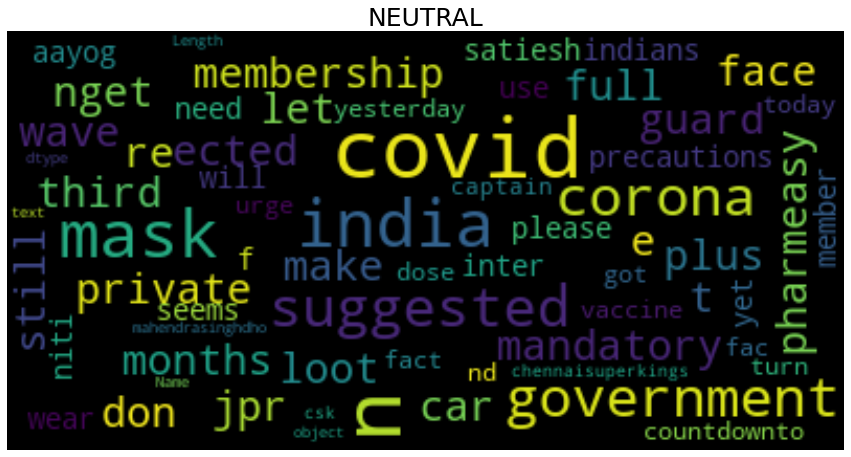

In [424]:
#wordcount with sentiment
pos = tweet['text'][tweet['sentiment'] == 'positive']
show_wordcloud(pos , 'POSITIVE')

neg = tweet['text'][tweet['sentiment'] == 'negative']
show_wordcloud(neg , 'NEGATIVE')

neutral = tweet['text'][tweet['sentiment'] == 'neutral']
show_wordcloud(neutral , 'NEUTRAL')

In [425]:
count = pd.DataFrame(tweet.groupby('sentiment').sum())
count

,created_at,text,screen_name,location,polarity
sentiment,,,,,
negative,18-09-2021 08:2817-09-2021 06:0017-09-2021 02:...,average people see inside hospital public plac...,b'sajanjohn'b'briflynews'b'ankitcts1'b'NewsLiv...,"b'Bengaluru, India'b'India'b'Noida, India'b'Gu...",-65.418323
neutral,19-09-2021 06:2519-09-2021 04:4519-09-2021 04:...,loot nget pharmeasy plus months membership re ...,b'on9deals'b'mrinaljaipur'b'MayaSharmaNDTV'b'P...,"b'Mumbai, India'b'Jaipur, India'b'Bengaluru, I...",0.000000
positive,18-09-2021 12:4518-09-2021 05:5417-09-2021 10:...,using mask getting vaccinated unlock chances g...,b'DoITCRaj'b'HinduUrjaa'b'HelpNowIndia'b'kunje...,"b'Jaipur, India'b'Patna, India'b'Mumbai, India...",325.448171


In [426]:
words = []
words = [word for i in tweet.text for word in i.split()]

In [427]:
words

['loot',
 'nget',
 'pharmeasy',
 'plus',
 'months',
 'membership',
 're',
 'n',
 'nvisit',
 'membership',
 'jpr',
 'face',
 'mask',
 'still',
 'mandatory',
 'private',
 'car',
 'fully',
 'vaccinated',
 'driver',
 'passangers',
 'covid',
 'police',
 'don',
 't',
 'let',
 'guard',
 'covid',
 'third',
 'wave',
 'e',
 'ected',
 'make',
 'difference',
 'impact',
 'n',
 'nmask',
 'using',
 'mask',
 'getting',
 'vaccinated',
 'unlock',
 'chances',
 'getting',
 'free',
 'worries',
 'stay',
 'safe',
 'n',
 'n',
 'doitc',
 'average',
 'people',
 'see',
 'inside',
 'hospital',
 'public',
 'place',
 'wear',
 'mask',
 'nose',
 'precautions',
 'covid',
 'suggested',
 'government',
 'india',
 'interest',
 'custome',
 'satiesh',
 'covid',
 'suggested',
 'government',
 'india',
 'interest',
 'customers',
 'employee',
 'jharkhand',
 'covid',
 'guidelines',
 'right',
 'now',
 'atleast',
 'don',
 't',
 'appear',
 'picture',
 'cm',
 'dear',
 'nflights',
 'mein',
 'mask',
 'face',
 'shield',
 'amp',
 'ppe',

In [428]:
freq = Counter(words).most_common(30)
freq = pd.DataFrame(freq)
freq.columns = ['word', 'frequency']
freq.head(20)

,word,frequency
0,n,4514
1,covid,1888
2,dose,1544
3,sep,1525
4,slots,1482
5,nage,1482
6,pincode,1459
7,ndate,1459
8,nfees,1459
9,f,1315


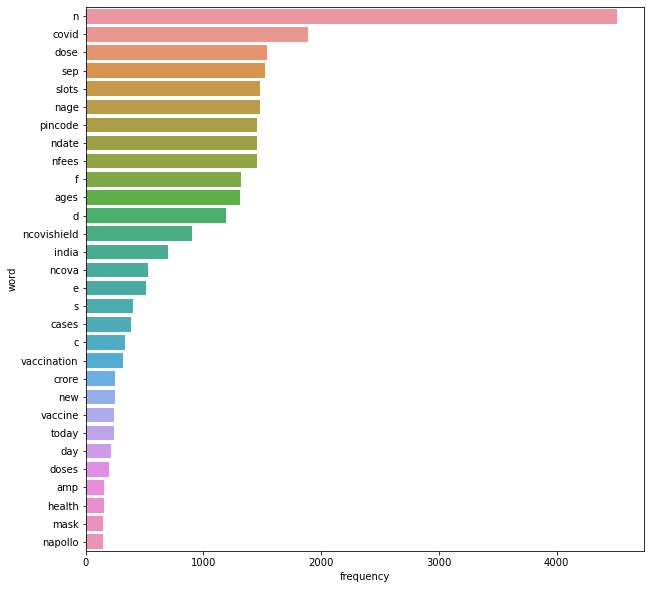

In [429]:
plt.figure(figsize = (10, 10))
sns.barplot(y="word", x="frequency",data=freq);

In [431]:
tweet.to_csv(r'C:\Users\DELL\Desktop\mask covid19\mask dataset\INDIAMASKtweetfinalsentiment.csv',index=False)

In [533]:
sentiment_df.head()

,text,polarity,sentiment
0,loot nget pharmeasy plus months membership re ...,0.0,neutral
1,jpr face mask still mandatory private car full...,0.0,neutral
2,don t let guard covid third wave e ected make ...,0.0,neutral
3,using mask getting vaccinated unlock chances g...,0.45,positive
4,average people see inside hospital public plac...,-0.075,negative


In [535]:
sentiment_df.describe()

,text,polarity,sentiment
count,4399,4399.0,4399
unique,2813,279.0,3
top,pincode ncovishield dose slots n nage ages nda...,0.0,neutral
freq,24,2886.0,2886


In [536]:
sentiment_df.groupby('sentiment').size()

sentiment
negative     354
neutral     2886
positive    1159
dtype: int64

In [537]:
print(sentiment_df.groupby('polarity').size())

polarity
-1.000000     4
-0.800000     4
-0.800000     2
-0.700000     2
-0.700000     1
             ..
 0.800000    35
 0.850000     3
 0.900000     6
 0.933333     1
 1.000000    16
Length: 279, dtype: int64


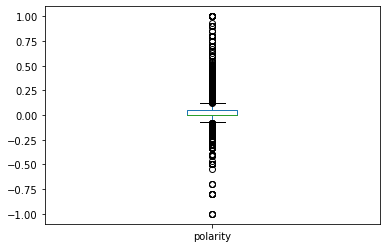

In [548]:
import matplotlib.pyplot as plt
sentiment_df.plot(kind='box', subplots=True, layout=(1,1), sharex=False, sharey=False)
plt.show()


In [551]:
clo=['sentiment','polarity','text']
dataset2=sentiment_df.reindex(columns=clo)
#dataset2.head()
dataset2[:10]

,sentiment,polarity,text
0,neutral,0.0,loot nget pharmeasy plus months membership re ...
1,neutral,0.0,jpr face mask still mandatory private car full...
2,neutral,0.0,don t let guard covid third wave e ected make ...
3,positive,0.45,using mask getting vaccinated unlock chances g...
4,negative,-0.075,average people see inside hospital public plac...
5,neutral,0.0,precautions covid suggested government india i...
6,neutral,0.0,satiesh covid suggested government india inter...
7,positive,0.285714,jharkhand covid guidelines right now atleast d...
8,neutral,0.0,dear nflights mein mask face shield amp ppe go...
9,neutral,0.0,covid suggested government india interest cust...


In [553]:
dataset2.describe()#dataset2.hist()
#plt.show()

,sentiment,polarity,text
count,4399,4399.0,4399
unique,3,279.0,2813
top,neutral,0.0,pincode ncovishield dose slots n nage ages nda...
freq,2886,2886.0,24


In [557]:
dataset[:10]

,created_at,text,screen_name,location,sentiment,polarity
0,19-09-2021 06:25,loot nget pharmeasy plus months membership re ...,b'on9deals',"b'Mumbai, India'",neutral,0.000000
1,19-09-2021 04:45,jpr face mask still mandatory private car full...,b'mrinaljaipur',"b'Jaipur, India'",neutral,0.000000
2,19-09-2021 04:22,don t let guard covid third wave e ected make ...,b'MayaSharmaNDTV',"b'Bengaluru, India'",neutral,0.000000
3,18-09-2021 12:45,using mask getting vaccinated unlock chances g...,b'DoITCRaj',"b'Jaipur, India'",positive,0.450000
4,18-09-2021 08:28,average people see inside hospital public plac...,b'sajanjohn',"b'Bengaluru, India'",negative,-0.075000
5,18-09-2021 07:08,precautions covid suggested government india i...,b'POCOSupport',b'India',neutral,0.000000
6,18-09-2021 07:00,satiesh covid suggested government india inter...,b'RedmiSupportIN',b'India',neutral,0.000000
7,18-09-2021 05:54,jharkhand covid guidelines right now atleast d...,b'HinduUrjaa',"b'Patna, India'",positive,0.285714
8,18-09-2021 05:29,dear nflights mein mask face shield amp ppe go...,b'Manish_B2V',"b'Bhubaneshwar, India'",neutral,0.000000
9,18-09-2021 04:49,covid suggested government india interest cust...,b'POCOSupport',b'India',neutral,0.000000


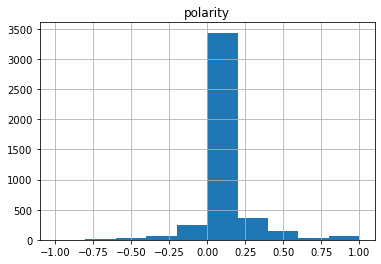

In [556]:
dataset.hist()
plt.show()

In [445]:
df1=pd.DataFrame(x_train)
df1=df1.rename(columns={0:'text'})

In [446]:
df1.head()

,text
0,pincode ncovishield dose slots n nage ages nda...
1,day tweeting replies n n mivscsk ipl o arrestp...
2,amp n islands covid update n n new cases disch...
3,pincode ncova n dose slots n nage ages ndate s...
4,pincode ncovishield dose slots n nage ages nda...


In [447]:
df2=pd.DataFrame(y_train)
df2=df2.rename(columns={0:'sentiment'})
df_train=pd.concat([df1,df2],axis=1)

In [448]:
df_train.head()

,text,sentiment
0,pincode ncovishield dose slots n nage ages nda...,neutral
1,day tweeting replies n n mivscsk ipl o arrestp...,positive
2,amp n islands covid update n n new cases disch...,positive
3,pincode ncova n dose slots n nage ages ndate s...,neutral
4,pincode ncovishield dose slots n nage ages nda...,neutral


In [449]:
df3=pd.DataFrame(x_test)
df3=df3.rename(columns={0:'text'})

In [450]:
df4=pd.DataFrame(y_test)
df4=df2.rename(columns={0:'sentiment'})
df_test=pd.concat([df3,df4],axis=1)

In [451]:
df_test.head()

,text,sentiment
0,today s covid status report koraput n staysafe...,neutral
1,guinea declares end marburg virus outbreak n n...,positive
2,staysafe vaccinate maskup n nlooks today ten m...,positive
3,pincode ncova n dose slots n nage ages ndate s...,neutral
4,cit heart one see rightly essential invisible ...,neutral


In [452]:
#removing punctuations
#library that contains punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [453]:
def remove_punctuation(text):
  if(type(text)==float):
    return text
  ans=""  
  for i in text:     
    if i not in string.punctuation:
      ans+=i    
  return ans

In [454]:
#storing the puntuation free text in a new column called clean_msg
df_train['text']= df_train['text'].apply(lambda x:remove_punctuation(x))
df_test['text']= df_test['text'].apply(lambda x:remove_punctuation(x))

In [456]:
df_train.head()
#punctuations are removed from news column in train dataset

,text,sentiment
0,pincode ncovishield dose slots n nage ages nda...,neutral
1,day tweeting replies n n mivscsk ipl o arrestp...,positive
2,amp n islands covid update n n new cases disch...,positive
3,pincode ncova n dose slots n nage ages ndate s...,neutral
4,pincode ncovishield dose slots n nage ages nda...,neutral


In [457]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [466]:
#method to generate n-grams:
#params:
#text-the text for which we have to generate n-grams
#ngram-number of grams to be generated from the text(1,2,3,4 etc., default value=1)
def generate_N_grams(text,ngram=1):
  words=[word for word in text.split(" ") if word not in set(stopwords.words('english'))]  
  print("Sentence after removing stopwords:",words)
  temp=zip(*[words[i:] for i in range(0,ngram)])
  ans=[' '.join(ngram) for ngram in temp]
  return ans

In [467]:
from collections import defaultdict
positiveValues=defaultdict(int)
negativeValues=defaultdict(int)
neutralValues=defaultdict(int)
#get the count of every word in both the columns of df_train and df_test dataframes

In [468]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
for text in df_train[df_train.sentiment=="positive"].text:
  for word in generate_N_grams(text):
    positiveValues[word]+=1

Sentence after removing stopwords: ['day', 'tweeting', 'replies', 'n', 'n', 'mivscsk', 'ipl', 'arrestpratikgandhi', 'klrahul', 'real', 'withgambhir']
Sentence after removing stopwords: ['amp', 'n', 'islands', 'covid', 'update', 'n', 'n', 'new', 'cases', 'discharged', 'n', 'active', 'cases']
Sentence after removing stopwords: ['last', 'hours', 'new', 'covid', 'cases', 'india', 'higher', 'yesterday']
Sentence after removing stopwords: ['news', 'ncr', 'data', 'crime', 'surge', 'mostly', 'covid', 'violations', 'n', 'covid', 'newsupdates', 'newsalert']
Sentence after removing stopwords: ['india', 'touring', 'new', 'zealand', 'later', 'year', 'due', 'packed', 'calendar', 'amp', 'covid', 'related', 'restrictions']
Sentence after removing stopwords: ['covid', 'might', 'multiple', 'animal', 'origins', 'finds', 'new', 'study', 'n']
Sentence after removing stopwords: ['spectacular', 'real', 'time', 'updated', 'website', 'covid', 'vaccination', 'count', 'check', 'cowin', 'website', 'nlin']
Sentenc

Sentence after removing stopwords: ['want', 'die', 'cancer', 'smoking', 'right', 'smoking', 'around']
Sentence after removing stopwords: ['depending', 'mask', 'worn', 'mask', 'maintained', 'one', 'easily', 'tell', 'much', 'shits', 'pers']
Sentence after removing stopwords: ['indiafightscorona', 'n', 'n', 'f', 'f', 'cleanliness', 'n', 'f', 'f', 'vaccination', 'n', 'f', 'f', 'strictness', 'nwill', 'help', 'win', 'fight', 'covid']
Sentence after removing stopwords: ['perfect', 'breakout', 'today', 'n', 'ngoing', 'massive', 'speed', 'n', 'nstock', 'nno', 'n', 'nindia', 'vaccination', 'f', 'f', 'f', 'n', 'nmore', 'cr', 'vacc']
Sentence after removing stopwords: ['assam', 'reports', 'new', 'covid', 'cases', 'positivity', 'rate', 'dips', 'n', 'covid', 'assamcovidupdate', 'assam']
Sentence after removing stopwords: ['ravi', 'shastri', 'need', 'undergo', 'fit', 'fly', 'test', 'post', 'recovery', 'covid', 'n', 'n', 'ravishastri']
Sentence after removing stopwords: ['f', 'f', 'cumulative', 'vacci

Sentence after removing stopwords: ['tamil', 'nadu', 'covid', 'district', 'wise', 'case', 'details', 'n', 'n', 'covid']
Sentence after removing stopwords: ['free', 'n', 'npincode', 'ncovishield', 'dose', 'slots', 'n', 'nage']
Sentence after removing stopwords: ['covid', 'update', 'malkangiri', 'district', 'nno', 'positive', 'cases', 'detected', 'district', 'requesting']
Sentence after removing stopwords: ['covid', 'positive', 'pregnant', 'women', 'need', 'immediate', 'medical', 'attention', 'icmr', 'study', 'n', 'covid', 'coronavirus', 'icmr']
Sentence after removing stopwords: ['day', 'covid', 'report', 'india', 'abc', 'live', 'india', 'n', 'n', 'e']
Sentence after removing stopwords: ['become', 'clear', 'vaccination', 'held', 'september', 'india', 'capacity', 'crore', 'vaccinations', 'p']
Sentence after removing stopwords: ['india', 'reports', 'new', 'covid', 'cases', 'recoveries', 'deaths', 'last', 'hours', 'per', 'health', 'ministry']
Sentence after removing stopwords: ['new', 'cas

Sentence after removing stopwords: ['hospitals', 'kolkata', 'increasing', 'covid', 'beds', 'cater', 'fresh', 'rise', 'number', 'patients', 'covid', 'mykolkata']
Sentence after removing stopwords: ['defeated', 'covid', 'without', 'vaccine', 'nhow', 'nafter', 'many', 'deaths', 'defeated']
Sentence after removing stopwords: ['new', 'covid', 'cases', 'last', 'hours', 'n', 'coronavirusoutbreak', 'covid', 'pandemic']
Sentence after removing stopwords: ['fight', 'corona', 'vr', 'available', 'n', 'ue', 'unrealengine', 'indiedev', 'gamer', 'indiegamedev', 'indiegames']
Sentence after removing stopwords: ['f', 'dhow', 'treat', 'children', 'asymptomatic', 'covid', 'disease', 'n', 'e', 'f', 'fchildren', 'asymptomatic', 'amp', 'mild', 'covid']
Sentence after removing stopwords: ['rate', 'covid', 'cases', 'india', 'higher', 'yesterday', 'n', 'nbeginning', 'rd', 'wave', 'india', 'n', 'ngovts', 'need', 'ntak']
Sentence after removing stopwords: ['f', 'live', 'f', 'n', 'nprime', 'minister', 'interacts'

Sentence after removing stopwords: ['india', 'fully', 'vaccinates', 'adult', 'population', 'covid', 'centre', 'n', 'n', 'largestvaccinedrive']
Sentence after removing stopwords: ['asking', 'happening', 'safe', 'open', 'school', 'ngoverment', 'take', 'correct', 'deci']
Sentence after removing stopwords: ['remember', 'w', 'nw', 'wash', 'hands', 'nw', 'wear', 'mask', 'nw', 'watch', 'distance', 'nfollow', 'covid', 'appropriate', 'behaviour']
Sentence after removing stopwords: ['india', 'reports', 'new', 'covid', 'cases', 'deaths', 'last', 'hours', 'n', 'n', 'covid']
Sentence after removing stopwords: ['covid', 'punja', 'starts', 'first', 'genomesequencing', 'facility', 'patiala', 'la', 'n', 'n', 'punjabnews', 'n', 'covid']
Sentence after removing stopwords: ['icymi', 'f', 'f', 'beginning', 'third', 'wave', 'fresh', 'covid', 'cases', 'drastically', 'rising', 'kerala', 'maharashtra', 'f', 'f', 'n', 'nfull', 'story']
Sentence after removing stopwords: ['crore', 'doses', 'day', 'great', 'achiv

Sentence after removing stopwords: ['sudden', 'travel', 'plan', 'nchoose', 'rail', 'ntry', 'booking', 'ticket', 'nrail', 'ticket', 'available', 'train', 'depar']
Sentence after removing stopwords: ['sikkim', 'covid', 'update', 'new', 'cases', 'tests', 'total', 'cases', 'active', 'cured', 'discharged', 'new', 'recove']
Sentence after removing stopwords: ['many', 'fresh', 'covid', 'cases', 'reported', 'kerala', 'saturday', 'n', 'n']
Sentence after removing stopwords: ['kerala', 'reopen', 'schools', 'november', 'school', 'based', 'classes', 'standards', 'primary', 'section']
Sentence after removing stopwords: ['largestvaccinedrive', 'nwomen', 'braces', 'incessant', 'rains', 'que', 'large', 'numbers', 'covid', 'vaccination', 'camp']
Sentence after removing stopwords: ['one', 'brilliant', 'investigation', 'callous', 'mishandling', 'covid', 'tragedy', 'india']
Sentence after removing stopwords: ['enjoy', 'parent', 'certainly', 'widened', 'understanding', 'behavior', 'children', 'n', 'n', 'me

Sentence after removing stopwords: ['india', 'sunday', 'reported', 'new', 'covid', 'cases', 'new', 'deaths', 'data', 'published', 'ministry', 'health']
Sentence after removing stopwords: ['celebrated', 'birthday', 'facilitating', 'mega', 'covid', 'vaccination', 'drive', 'across', 'cou']
Sentence after removing stopwords: ['india', 'fight', 'covid', 'covidvaccine', 'akin', 'revolution', 'thanks', 'brillia']
Sentence after removing stopwords: ['happy', 'sunday', 'n', 'veerandrasingh', 'hollywood', 'investors', 'producers', 'actors', 'director', 'models', 'fitness', 'actingheadshot']
Sentence after removing stopwords: ['india', 'reports', 'new', 'covid', 'cases', 'recoveries', 'last', 'hours', 'per', 'union', 'health', 'ministry']
Sentence after removing stopwords: ['world', 'largest', 'vaccination', 'drive', 'going', 'good', 'pace', 'fellow', 'indians', 'getvaccinated', 'alread']
Sentence after removing stopwords: ['fantastic', 'india', 'makes', 'world', 'record', 'administrating', 'cr',

Sentence after removing stopwords: ['gentle', 'reminder', 'pandemic', 'yet', 'n', 'n', 'maskup', 'metgala']
Sentence after removing stopwords: ['major', 'milestone', 'india', 'fight', 'covid', 'n']
Sentence after removing stopwords: ['breaking', 'india', 'sets', 'new', 'single', 'day', 'record', 'administering', 'crores', 'covid', 'vaccine', 'doses', 'n', 'n', 'cowin', 'indians']
Sentence after removing stopwords: ['india', 'ready', 'partner', 'interested', 'countries', 'technology', 'transfer', 'manufacturing', 'indigenous', 'covid', 'vaccines']
Sentence after removing stopwords: ['think', 'e', 'osed', 'covid', 'infection', 'take', 'rt', 'pcr', 'tests', 'nsimpleekare', 'offers', 'home']
Sentence after removing stopwords: ['f', 'live', 'health', 'ministry', 'briefing', 'actions', 'taken', 'preparedness', 'updates', 'covid', 'n', 'n', 'watch']
Sentence after removing stopwords: ['india', 'administered', 'crore', 'covid', 'vaccine', 'doses', 'far', 'union', 'health', 'minister', 'mansukh

Sentence after removing stopwords: ['free', 'n', 'npincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ages']
Sentence after removing stopwords: ['covid', 'india', 'sets', 'new', 'record', 'administering', 'two', 'crore', 'vaccine', 'doses', 'narendramodi', 'birthday']
Sentence after removing stopwords: ['bangladesh', 'registers', 'new', 'deaths', 'due', 'covid', 'indiablooms', 'first', 'portal', 'digital', 'news', 'management']
Sentence after removing stopwords: ['india', 'daily', 'covid', 'vaccination', 'crossed', 'cr', 'highest', 'far', 'n', 'n', 'crore', 'china', 'june', 'hi']
Sentence after removing stopwords: ['free', 'n', 'npincode', 'ncovishield', 'dose', 'slots', 'n', 'nage']
Sentence after removing stopwords: ['following', 'covid', 'appropriate', 'behavior', 'classes', 'resume', 'kerala', 'colleges', 'oct', 'n', 'n', 'briflynews']
Sentence after removing stopwords: ['foreign', 'tourists', 'allowed', 'visit', 'india', 'soon', 'certain', 'restrictions', 'check', 'details', '

In [469]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="negative"
for text in df_train[df_train.sentiment=="negative"].text:
  for word in generate_N_grams(text):
    negativeValues[word]+=1

Sentence after removing stopwords: ['fate', 'children', 'seen', 'secondary', 'needs', 'adults', 'material', 'non', 'material', 'needs']
Sentence after removing stopwords: ['covid', 'third', 'wave', 'devastating', 'second', 'new', 'variant', 'says', 'top', 'virologist', 'gagandeep', 'kan']
Sentence after removing stopwords: ['cucumber', 'face', 'mask', 'dry', 'skin', 'e', 'apply', 'e', 'e', 'f', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'facemask', 'radhiradhikha', 'beautytips']
Sentence after removing stopwords: ['long', 'time', 'comprehensive', 'thread', 'covidvaccine', 'situation', 'make']
Sentence after removing stopwords: ['supreme', 'court', 'hearing', 'plea', 'seeking', 'compensation', 'illegal', 'detention', 'underwent', 'manipur', 'based', 'political', 'activ']
Sentence after removing stopwords: ['bhavani', 'rv', 'prolonged', 'period', 'school', 'closure', 'amp', 'restrained', 'group', 'e', 'hange', 'interaction', 'amp', 'play', 'due']
Sentence after removing stopwords: ['losses'

Sentence after removing stopwords: ['bhavani', 'rv', 'prolonged', 'period', 'school', 'closure', 'amp', 'restrained', 'group', 'e', 'hange', 'interaction', 'amp', 'play', 'due']
Sentence after removing stopwords: ['unfortunately', 'working', 'unethically', 'n', 'nounethicalvaccine', 'n', 'covid']
Sentence after removing stopwords: ['f', 'f', 'covid', 'pandemic', 'might', 'virus', 'stay', 'long', 'official', 'f', 'f', 'n', 'nfull', 'story']
Sentence after removing stopwords: ['covid', 'vaccinated', 'people', 'spreading', 'deadly', 'virus', 'variants', 'support', 'vaccinepassports', 'ar']
Sentence after removing stopwords: ['situation', 'covid', 'us', 'getting', 'precarious', 'deaths', 'per', 'day', 'taking', 'place', 'due', 'vir']
Sentence after removing stopwords: ['india', 'badly', 'needs', 'opposition', 'positive', 'mindset', 'n', 'n', 'vaccination', 'covid']
Sentence after removing stopwords: ['almost', 'years', 'visit', 'india', 'hometown', 'prayagraj', 'due', 'covid', 'restricti']

Sentence after removing stopwords: ['million', 'doses', 'administered', 'single', 'day', 'ncongratulations', 'every', 'single', 'contributor', 'making', 'possible']
Sentence after removing stopwords: ['daily', 'covid', 'vaccinations', 'crossed', 'one', 'crore', 'mark', 'fourth', 'time', 'less', 'month', 'taking', 'total', 'n']
Sentence after removing stopwords: ['students', 'bangladesh', 'aged', 'start', 'getting', 'us', 'made', 'pfizer', 'covid', 'vaccine', 'ne', 'days']
Sentence after removing stopwords: ['th', 'september', 'india', 'reported', 'crore', 'vaccinations', 'pm', 'n', 'nmore', 'crore', 'people', 'vaccinated', 'single', 'da']
Sentence after removing stopwords: ['india', 'administered', 'cr', 'vaccines', 'single', 'day', 'till', 'pm', 'c', 'c', 'n', 'covid', 'india']
Sentence after removing stopwords: ['massive', 'covid', 'vaccine', 'doses', 'administered', 'single', 'day', 'congratulations', 'india']
Sentence after removing stopwords: ['post', 'covid', 'harming', 'people',

In [470]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="neutral"
for text in df_train[df_train.sentiment=="neutral"].text:
  for word in generate_N_grams(text):
    neutralValues[word]+=1

Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nvivekanan']
Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'npan', 'nagar']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nmga', 'hospi']
Sentence after removing stopwords: ['taliban', 'terrorist', 'covid', 'n', 'mask', 'burkha', 'compulsary', 'n', 'home', 'isolation', 'n', 'spread', 'come', 'contact', 'n', 'kills']
Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nnano', 'hospi']
Sentence after removing stopwords: ['covid', 'cr', 'vaccine', 'doses', 'provided', 'states', 'uts', 'n']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ndate', 'sep', 'nfees', 'nunited', 'hospital', 'jayana']
S

Sentence after removing stopwords: ['fight', 'covid', 'n', 'n']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nneighbour']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nkanva', 'dia']
Sentence after removing stopwords: ['aai', 'coimbatore', 'international', 'airport', 'n', 'n', 'n', 'update', 'arrival', 'departure', 'flight', 'schedule']
Sentence after removing stopwords: ['sep', 'maharashtra', 'covid', 'update', 'n', 'nactive', 'cases', 'f', 'n', 'nconfirmed', 'f', 'nrecovered', 'f', 'c']
Sentence after removing stopwords: ['world', 'f', 'c', 'covid', 'vaccination', 'update', 'n', 'ntotal', 'doses', 'n', 'n', 'f', 'f', 'f', 'n', 'nchina', 'f', 'f', 'nindia', 'f', 'e', 'f']
Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nnu', 'hospital']
Sentence afte

Sentence after removing stopwords: ['karnataka', 'administers', 'lakh', 'doses', 'covid', 'vaccine', 'sept', 'till', 'pm', 'recording', 'highest', 'si']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nr', 'x', 'sidd']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nmiracle', 'h']
Sentence after removing stopwords: ['pincode', 'nsputnik', 'v', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'ndr', 'ayyap']
Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'npan', 'nagar']
Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nspringleaf']
Sentence after removing stopwords: ['probably', 'said', 'scottish', 'church', 'college', 'remains', 'one', 'favourite', 'places', 'host', 

Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'napollo', 'h']
Sentence after removing stopwords: ['workers', 'immune', 'covid', 'amp', 'fines', 'impose', 'penalty']
Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nnu', 'hospita']
Sentence after removing stopwords: ['catholic', 'bishops', 'kenya', 'banned', 'politicians', 'addressing', 'congregations', 'churches', 'concerns']
Sentence after removing stopwords: ['according', 'researchers', 'people', 'hit', 'genetic', 'jackpot', 'superhumanimmunity', 'covid']
Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nmiracle', 'hea']
Sentence after removing stopwords: ['day', 'international', 'symposium', 'reimagining', 'inclusive', 'cities', 'covid', 'era', 'september']
Sentence after removing stopwords: ['pincode', 'n

Sentence after removing stopwords: ['f', 'bregional', 'assamese', 'evening', 'news', 'n', 'f', 'hours', 'f', 'f', 'f', 'covid', 'n', 'n', 'covid', 'e', 'f', 'c', 'c']
Sentence after removing stopwords: ['bmc', 'decided', 'ramp', 'vaccinationdrive', 'women', 'mumbai', 'n', 'corona', 'covid', 'vaccination']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nkanva', 'dia']
Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nmilann', 'hosp']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'naster', 'rv']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nr', 'x', 'whi']
Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 

Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ndate', 'sep', 'nfees', 'nrainbow', 'royal', 'meenakshi']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'napollo', 'c']
Sentence after removing stopwords: ['ludhiana', 'e', 'els', 'covid', 'tests', 'punja', 'confirms', 'n', 'nconducts', 'tests', 'last', 'days']
Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nnu', 'hospita']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'napollo', 'cr']
Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'ncolumbia']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nmotherhoo']
Senten

Sentence after removing stopwords: ['way', 'india', 'responded', 'covid', 'pandemic', 'guidance', 'leadership', 'truly', 'made', 'india', 'g']
Sentence after removing stopwords: ['char', 'dham', 'yatra', 'starts', 'today', 'n', 'n', 'chardhamyatra', 'covid', 'rtpcrtest', 'tourism', 'travel', 'uttarakhand']
Sentence after removing stopwords: ['india', 'india', 'cumulative', 'covid', 'vaccination', 'coverage', 'crosses', 'landmark', 'cr', 'n', 'nthe', 'highest', 'vac']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ndate', 'sep', 'nfees', 'naster', 'manyata', 'clinic', 'ye']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nagadi', 'hos']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nsagar', 'ho']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage',

Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nhamilton']
Sentence after removing stopwords: ['grateful', 'upa', 'ruling', 'country', 'covid']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nkims', 'hos']
Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nmiracle', 'hel']
Sentence after removing stopwords: ['india', 'crosses', 'one', 'crore', 'mark', 'covid', 'vaccinations', 'day', 'dunno', 'figure', 'land', 'end']
Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nsparsh', 'hos']
Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'ndayanand', 'sa']
Sentence after removing stopwords: ['dose', 'c', 'ndose', 'c',

Sentence after removing stopwords: ['businessnews', 'gst', 'council', 'meet', 'lucknow', 'friday', 'take', 'decisions', 'issues', 'related', 'duty', 'revision']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ndate', 'sep', 'nfees', 'nvikram', 'hospital', 'block']
Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nteatree']
Sentence after removing stopwords: ['blogalert', 'n', 'nglobal', 'value', 'chains', 'gvcs', 'undergo', 'drastic', 'transformation', 'post', 'covid', 'world', 'n', 'nhere']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nr', 'x', 'sidd']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nmotherhoo']
Sentence after removing stopwords: ['let', 'guard', 'covid', 'third', 'wave', 'e', 'ected', 'make',

Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nsparsh', 'h']
Sentence after removing stopwords: ['today', 'sarvodaya', 'bal', 'vidyalaya', 'ashok', 'nagar', 'delhi', 'electricity', 'problem', 'yesterday']
Sentence after removing stopwords: ['indian', 'army', 'always', 'awaam', 'f', 'e', 'f', 'n', 'gfvip', 'e', 'impftod', 'bbnajia', 'f', 'c', 'bbtvi']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nr', 'x', 'sama']
Sentence after removing stopwords: ['india', 'surpasses', 'europe', 'total', 'number', 'covid', 'vaccines', 'administered', 'n', 'n', 'crore', 'f', 'doses', 'administered', 'pm', 'bir']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nprima', 'dia']
Sentence after removing stopwords: ['india', 'leading', 'globe', 'worldsfastestvaccinedrive', '

Sentence after removing stopwords: ['india', 'administers', 'crore', 'vaccines', 'daily', 'positivity', 'rate', 'drops', 'india', 'n', 'n', 'india', 'positvityrate']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nhealing', 'h']
Sentence after removing stopwords: ['indiafightscorona', 'n', 'n', 'f', 'dworld', 'largestvaccinedrive', 'breaking', 'records', 'strengthening', 'india', 'fight', 'covid']
Sentence after removing stopwords: ['f', 'covid', 'vaccination', 'update', 'day', 'n', 'n', 'f', 'aunion', 'health', 'minister', 'congratulates', 'health', 'care', 'workers', 'people']
Sentence after removing stopwords: ['ipl', 'bcci', 'conduct', 'remaining', 'matches', 'ipl', 'uae', 'starting', 'th', 'sept', 'th', 'oct', 'n', 'n', 'ipl', 'bcci', 'uae']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'ncratis', 'ho']
Sentence after removin

Sentence after removing stopwords: ['covid', 'vaccinations', 'per', 'minute', 'india', 'today']
Sentence after removing stopwords: ['million', 'took', 'minutes', 'pm', 'cowin', 'covid', 'n']
Sentence after removing stopwords: ['joe', 'root', 'grandfather', 'slams', 'hundred', 'compares', 'covid', 'n', 'n', 'joeroot', 'thehundred', 'covid']
Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nsparsh', 'hos']
Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ndate', 'sep', 'nfees', 'ncolumbia', 'asia', 'hosp', 'hebbal']
Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nmilann', 'hosp']
Sentence after removing stopwords: ['million', 'covidvaccine', 'shots', 'given', 'india', 'sep', 'n', 'nat', 'rate', 'fully', 'vaccinate', 'n', 'us', 'mont']
Sentence after removing stopwords: ['india', 'created', 'wor

Sentence after removing stopwords: ['india', 'crore', 'vaccination', 'drive', 'f', 'n', 'sabkovaccinemuftvaccine', 'n', 'largestvaccinationdrive']
Sentence after removing stopwords: ['former', 'prime', 'minister', 'mauritius', 'navinchandra', 'ramgoolam', 'saturday', 'shifted', 'private', 'ward', 'aiims']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nnu', 'hospi']
Sentence after removing stopwords: ['part', 'seva', 'samarpan', 'abhiyaan', 'covid', 'vaccination', 'drive', 'conducted', 'bjp', 'head', 'office', 'marathaha']
Sentence after removing stopwords: ['reached', 'mark', 'crore', 'jabs', 'days', 'go', 'month', 'target', 'crore', 'jabs', 'end']
Sentence after removing stopwords: ['amid', 'escalating', 'covid', 'situation', 'mizoram', 'health', 'minister', 'holds', 'crucial', 'meet', 'municipal', 'body', 'councillors']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'n

Sentence after removing stopwords: ['nirmala', 'sitharaman', 'announced', 'gst', 'e', 'ension', 'covid', 'related', 'drugs', 'till', 'december', 'increased', 'rate', 'loc']
Sentence after removing stopwords: ['covid', 'india', 'administered', 'crore', 'daily', 'vaccinations', 'till', 'pm', 'today', 'covid', 'coronavirus']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'ndigvish', 'h']
Sentence after removing stopwords: ['blackfungus', 'mucormycosis', 'caused', 'group', 'moulds', 'called', 'mucormycetes', 'potentially', 'fatal', 'infecti']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nvasavi', 'ho']
Sentence after removing stopwords: ['despite', 'getting', 'double', 'dose', 'vaccines', 'need', 'continue', 'take', 'steps', 'protect', 'covid']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage'

Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nrakshobhya']
Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'niqure', 'healt']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nlakshmi']
Sentence after removing stopwords: ['ipl', 'fans', 'allowed', 'entry', 'sharjahstadium', 'pcr', 'covid', 'report', 'needed', 'dubai']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nbrindhav']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ndate', 'sep', 'nfees', 'nvikram', 'hospital', 'block']
Sentence after removing stopwords: ['former', 'cricketer', 'yuvraj', 'singh', 'assam', 'health', 'minister', 'kesha', 'mahanta', 'virtually', 'inaugurate', 'icu

Sentence after removing stopwords: ['online', 'doctor', 'consultation', 'wherever', 'nvisit', 'india', 'mask', 'health']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'ne', 'el', 'car']
Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ndate', 'sep', 'nfees', 'nsuguna', 'hospital', 'west', 'b']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nhealing']
Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'napollo', 'clin']
Sentence after removing stopwords: ['rather', 'thinking', 'binaries', 'school', 'closure', 'reopening', 'singapore', 'government', 'took', 'nuanced', 'app']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nrajshekar']
Sentenc

Sentence after removing stopwords: ['total', 'covid', 'vaccination', 'doses', 'administered', 'around', 'world', 'million', 'n']
Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'ndr', 'sunny']
Sentence after removing stopwords: ['mask', 'wearing', 'protect', 'covid', 'may', 'saving', 'oral', 'hygiene', 'woes']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nmotherho']
Sentence after removing stopwords: ['whatta', 'gift', 'people', 'bharat', 'giving', 'modi', 'ji', 'day', 'n', 'nand', 'pm', 'kudos', 'n', 'n']
Sentence after removing stopwords: ['victoria', 'hospital', 'gradually', 'attending', 'cases', 'covid', 'daily', 'requirement']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'napollo', 'c']
Sentence after removing stopwords: ['pincode', 'ncova', 'n', '

Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'ngvg', 'invivo']
Sentence after removing stopwords: ['country', 'crosses', 'mark', 'one', 'crore', 'vaccination', 'fastest', 'till', 'p', 'today', 'health', 'minister', 'mansukhmandaviya']
Sentence after removing stopwords: ['slovenian', 'authorities', 'chose', 'close', 'schools', 'pandemic', 'businesses', 'simply']
Sentence after removing stopwords: ['emergency', 'use', 'authorisation', 'cova', 'n', 'covid', 'vaccine', 'delayed', 'yet']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nr', 'x', 'sid']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'ncura', 'hosp']
Sentence after removing stopwords: ['congratulations', 'india', 'vaccinating', 'crore', 'indians', 'today', 'happybirthdaymodiji', 'covid']
Sentence

Sentence after removing stopwords: ['f', 'f', 'f', 'f', 'e', 'c', 'e', 'f', 'c', 'c', 'e', 'c', 'e', 'c', 'c', 'c', 'e', 'c', 'e', 'c', 'e', 'e', 'f', 'f', 'f', 'f', 'c', 'c', 'e', 'c', 'n', 'n', 'largestvaccinedrive']
Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nr', 'x', 'white']
Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'napollo', 'cm', 'f']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nrakshobhy']
Sentence after removing stopwords: ['billion', 'covid', 'vaccine', 'doses', 'administered', 'affiliated', 'south', 'east', 'asian', 'countries', 'india', 'ha']
Sentence after removing stopwords: ['india', 'crore', 'doses', 'covishield', 'crore', 'doses', 'cova', 'n', 'month', 'target', 'p']
Sentence after removing stopwords: ['pincode', 'ncovishield'

Sentence after removing stopwords: ['f', 'f', 'f', 'f', 'e', 'c', 'e', 'f', 'c', 'c', 'e', 'c', 'e', 'c', 'c', 'c', 'e', 'c', 'e', 'c', 'e', 'e', 'f', 'f', 'f', 'c', 'c', 'e', 'c', 'n', 'n', 'largestvaccinedrive']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nr', 'x', 'sama']
Sentence after removing stopwords: ['care', 'precaution', 'required', 'maskupindia', 'maskup']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nblossom']
Sentence after removing stopwords: ['industry', 'according', 'health', 'minister', 'thousands', 'health', 'workers', 'across', 'france', 'suspend']
Sentence after removing stopwords: ['maharashtra', 'health', 'minister', 'said', 'government', 'planning', 'increase', 'curbs']
Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'napollo',

Sentence after removing stopwords: ['population', 'fully', 'vaccinated', 'n', 'f', 'f', 'china', 'n', 'f', 'f', 'agermany', 'n', 'f', 'f', 'us', 'n', 'f', 'f', 'sri', 'lanka', 'n', 'f', 'f', 'turkey', 'n', 'f', 'f', 'brazi']
Sentence after removing stopwords: ['pincode', 'nsputnik', 'v', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nr', 'x', 'whit']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nbrookefie']
Sentence after removing stopwords: ['sikkim', 'sikkim', 'government', 'issued', 'directives', 'cur', 'spread', 'covid', 'state', 'effect', 'sep']
Sentence after removing stopwords: ['bjp', 'aims', 'make', 'pm', 'modi', 'birthday', 'historic', 'administering', 'record', 'covid', 'vaccine', 'doses', 'n', 'n']
Sentence after removing stopwords: ['dear', 'members', 'n', 'nkindly', 'provide', 'us', 'clarity', 'n', 'ni', 'vaccinated', 'th', 'aug', 'yet']
Sentence after removing stopwords: ['

In [471]:
#focus on more frequently occuring words for every sentiment=>
#sort in DO wrt 2nd column in each of positiveValues,negativeValues and neutralValues
df_positive=pd.DataFrame(sorted(positiveValues.items(),key=lambda x:x[1],reverse=True))
df_negative=pd.DataFrame(sorted(negativeValues.items(),key=lambda x:x[1],reverse=True))
df_neutral=pd.DataFrame(sorted(neutralValues.items(),key=lambda x:x[1],reverse=True))

In [472]:
pd1=df_positive[0][:10]
pd2=df_positive[1][:10]

In [473]:
ned1=df_negative[0][:10]
ned2=df_negative[1][:10]

In [474]:
nud1=df_neutral[0][:10]
nud2=df_neutral[1][:10]

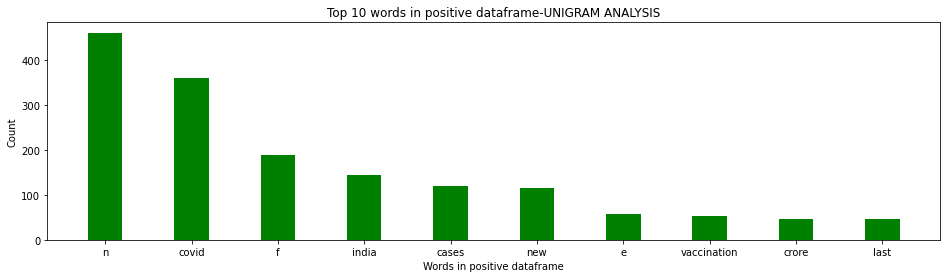

In [475]:
plt.figure(1,figsize=(16,4))
plt.bar(pd1,pd2, color ='green',
        width = 0.4)
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive dataframe-UNIGRAM ANALYSIS")
plt.savefig("positive-unigram.png")
plt.show()

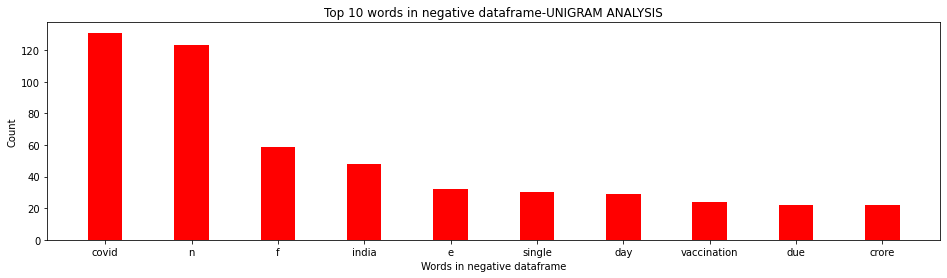

In [476]:
plt.figure(1,figsize=(16,4))
plt.bar(ned1,ned2, color ='red',
        width = 0.4)
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative dataframe-UNIGRAM ANALYSIS")
plt.savefig("negative-unigram.png")
plt.show()

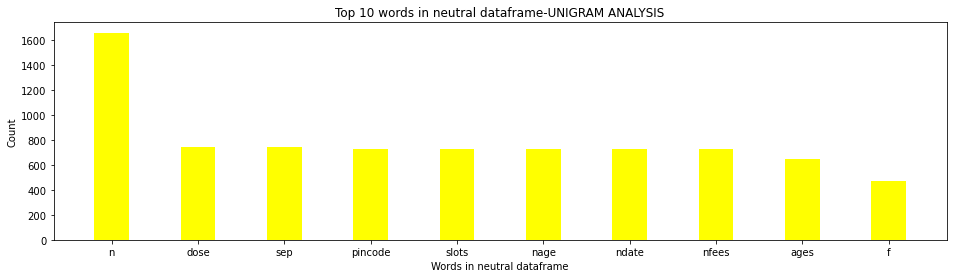

In [477]:
plt.figure(1,figsize=(16,4))
plt.bar(nud1,nud2, color ='yellow',
        width = 0.4)
plt.xlabel("Words in neutral dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in neutral dataframe-UNIGRAM ANALYSIS")
plt.savefig("neutral-unigram.png")
plt.show()

In [478]:
positiveValues2=defaultdict(int)
negativeValues2=defaultdict(int)
neutralValues2=defaultdict(int)
#get the count of every word in both the columns of df_train and df_test dataframes



In [479]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
for text in df_train[df_train.sentiment=="positive"].text:
  for word in generate_N_grams(text,2):
    positiveValues2[word]+=1

Sentence after removing stopwords: ['day', 'tweeting', 'replies', 'n', 'n', 'mivscsk', 'ipl', 'arrestpratikgandhi', 'klrahul', 'real', 'withgambhir']
Sentence after removing stopwords: ['amp', 'n', 'islands', 'covid', 'update', 'n', 'n', 'new', 'cases', 'discharged', 'n', 'active', 'cases']
Sentence after removing stopwords: ['last', 'hours', 'new', 'covid', 'cases', 'india', 'higher', 'yesterday']
Sentence after removing stopwords: ['news', 'ncr', 'data', 'crime', 'surge', 'mostly', 'covid', 'violations', 'n', 'covid', 'newsupdates', 'newsalert']
Sentence after removing stopwords: ['india', 'touring', 'new', 'zealand', 'later', 'year', 'due', 'packed', 'calendar', 'amp', 'covid', 'related', 'restrictions']
Sentence after removing stopwords: ['covid', 'might', 'multiple', 'animal', 'origins', 'finds', 'new', 'study', 'n']
Sentence after removing stopwords: ['spectacular', 'real', 'time', 'updated', 'website', 'covid', 'vaccination', 'count', 'check', 'cowin', 'website', 'nlin']
Sentenc

Sentence after removing stopwords: ['real', 'fears', 'potential', 'third', 'wave', 'n', 'nwhat', 'make', 'situation', 'pandemic', 'abates', 'virus']
Sentence after removing stopwords: ['report', 'herd', 'immunity', 'focused', 'vax', 'missing', 'important', 'factor', 'millions', 'develop', 'anti']
Sentence after removing stopwords: ['tamil', 'nadu', 'thursday', 'logged', 'new', 'coronavirus', 'cases', 'taking', 'overall', 'caseload']
Sentence after removing stopwords: ['want', 'die', 'cancer', 'smoking', 'right', 'smoking', 'around']
Sentence after removing stopwords: ['depending', 'mask', 'worn', 'mask', 'maintained', 'one', 'easily', 'tell', 'much', 'shits', 'pers']
Sentence after removing stopwords: ['indiafightscorona', 'n', 'n', 'f', 'f', 'cleanliness', 'n', 'f', 'f', 'vaccination', 'n', 'f', 'f', 'strictness', 'nwill', 'help', 'win', 'fight', 'covid']
Sentence after removing stopwords: ['perfect', 'breakout', 'today', 'n', 'ngoing', 'massive', 'speed', 'n', 'nstock', 'nno', 'n', '

Sentence after removing stopwords: ['india', 'seeing', 'static', 'trend', 'covid', 'cases', 'daily', 'past', 'days', 'number', 'cases', 'reported', 'daily', 'h']
Sentence after removing stopwords: ['covid', 'undone', 'much', 'progress', 'made', 'latinamerica', 'caribbean', 'countries', 'education']
Sentence after removing stopwords: ['odisha', 'records', 'new', 'covid', 'cases', 'n', 'n', 'odisha', 'odishanews', 'covid', 'corona', 'covidpandemic', 'covidsituation']
Sentence after removing stopwords: ['india', 'crosses', 'landmark', 'cr', 'covid', 'vaccination', 'pm', 'set', 'cross', 'cr', 'day', 'mark', 'special', 'drive']
Sentence after removing stopwords: ['crore', 'indians', 'got', 'covid', 'vaccination', 'hours', 'st', 'birthday', 'modi', 'best', 'tribute', 'gift']
Sentence after removing stopwords: ['covid', 'vaccinationdrive', 'n', 'link', 'parliament', 'report', 'action']
Sentence after removing stopwords: ['fight', 'corona', 'vr', 'available', 'n', 'ue', 'unrealengine', 'indied

Sentence after removing stopwords: ['odisha', 'crossed', 'another', 'significant', 'milestone', 'fight', 'covid', 'ensuring', 'least', 'one', 'dose', 'va']
Sentence after removing stopwords: ['notably', 'mask', 'finds', 'mention', 'twice', 'n', 'n', 'wear', 'mask', 'n', 'n', 'neglect', 'mask', 'n', 'n', 'flupandemic', 'influenza']
Sentence after removing stopwords: ['times', 'covid', 'remote', 'pair', 'programming', 'become', 'important', 'learn']
Sentence after removing stopwords: ['odisha', 'reports', 'fresh', 'covid', 'cases', 'children', 'age', 'group', 'n', 'nknow', 'district', 'wise', 'det']
Sentence after removing stopwords: ['american', 'samoa', 'reports', 'first', 'covid', 'case', 'resident', 'returns', 'island', 'hawaii']
Sentence after removing stopwords: ['diagnosis', 'early', 'onset', 'alzheimersdisease', 'life', 'changing', 'corinne', 'mike', 'devoted', 'caregiver']
Sentence after removing stopwords: ['among', 'adults', 'n', 'mild', 'covid', 'day', 'course', 'ivermectin',

Sentence after removing stopwords: ['covid', 'india', 'sets', 'new', 'world', 'record', 'crore', 'vaccine', 'doses', 'day', 'vaccinationdrive']
Sentence after removing stopwords: ['kerala', 'impose', 'special', 'intensified', 'stringent', 'lockdown', 'restrictions', 'indiablooms', 'first', 'portal', 'digital', 'news']
Sentence after removing stopwords: ['covid', 'brought', 'calamity', 'health', 'economic', 'front', 'well', 'troubles', 'corporate', 'sector', 'n', 'ncom']
Sentence after removing stopwords: ['unite', 'fightcorona', 'largestvaccinedrive', 'follow', 'covid', 'appropriate', 'behaviour', 'ca', 'along', 'getting', 'fully']
Sentence after removing stopwords: ['royal', 'family', 'kashi', 'organizes', 'year', 'old', 'ramlila', 'ramnagar', 'varanasi', 'wrote', 'letter', 'police']
Sentence after removing stopwords: ['covid', 'legal', 'notice', 'served', 'staredecisis', 'violating', 'laws', 'india', 'including']
Sentence after removing stopwords: ['best', 'gift', 'narendra', 'modi',

Sentence after removing stopwords: ['side', 'effect', 'mountains', 'travel', 'long', 'got', 'panic', 'seeing', 'many', 'people', 'around', 'n', 'nand', 'people', 'beha']
Sentence after removing stopwords: ['vaccinated', 'covid', 'avail', 'diwali', 'schemes', 'puducherry', 'puducherry', 'new', 'indian', 'e', 'ress']
Sentence after removing stopwords: ['india', 'showing', 'decline', 'number', 'new', 'covid', 'cases', 'per', 'cent', 'new', 'cases', 'reported']
Sentence after removing stopwords: ['india', 'reports', 'covid', 'cases', 'deaths', 'hours', 'indiablooms', 'first', 'portal', 'digital', 'news', 'manag']
Sentence after removing stopwords: ['kerala', 'reports', 'fresh', 'covid', 'infections', 'recoveries', 'deaths', 'today', 'death', 'toll', 'rises']
Sentence after removing stopwords: ['today', 'crore', 'thanks', 'unsungheroes', 'aasha', 'workers', 'healthcare', 'professionals', 'citizens', 'comi']
Sentence after removing stopwords: ['organic', 'cotton', 'natural', 'dye', 'masks', 

Sentence after removing stopwords: ['many', 'families', 'especially', 'lost', 'loved', 'ones', 'covid', 'scratching', 'heads', 'took']
Sentence after removing stopwords: ['due', 'respect', 'say', 'per', 'new', 'cbse', 'circular', 'students']
Sentence after removing stopwords: ['identify', 'new', 'variants', 'coronavirus', 'punja', 'government', 'commenced', 'first', 'state', 'run', 'covid', 'genome', 'sequ']
Sentence after removing stopwords: ['yes', 'infrastructure', 'important', 'without', 'solving', 'jo', 'problems', 'without', 'distributing', 'free', 'masks']
Sentence after removing stopwords: ['th', 'mask', 'n', 'norder', 'filled', 'pump', 'n', 'ndeal', 'n', 'new', 'coin', 'posted', 'n', 'n', 'kar', 'x', 'n', 'mask', 'n', 'nrest', 'buying', 'done']
Sentence after removing stopwords: ['flash', 'jammu', 'kashmir', 'wednesday', 'witnessed', 'one', 'death', 'fresh', 'positive', 'cases', 'taking', 'number', 'total', 'ac']
Sentence after removing stopwords: ['india', 'reports', 'new', '

Sentence after removing stopwords: ['covid', 'mizoram', 'reports', 'fresh', 'infections', 'deaths', 'active', 'cases']
Sentence after removing stopwords: ['best', 'choice', 'captaincy', 'n', 'n', 'rohitsharma', 'rohit', 'rohithsharma', 'viral', 'viratkohli', 'rc', 'appleevent']
Sentence after removing stopwords: ['meditate', 'every', 'day', 'groundwork', 'happy', 'amp', 'contented', 'mind', 'glow', 'good', 'health', 'n', 'n', 'motivation']
Sentence after removing stopwords: ['occasion', 'pmmodibirthday', 'india', 'set', 'new', 'record', 'administered', 'crore', 'covid', 'vaccine', 'doses']
Sentence after removing stopwords: ['using', 'mask', 'getting', 'vaccinated', 'unlock', 'chances', 'getting', 'free', 'worries', 'stay', 'safe', 'n', 'n', 'doitc']
Sentence after removing stopwords: ['india', 'registers', 'new', 'cases', 'last', 'hours', 'higher', 'yesterday', 'brings', 'total', 'caseload']
Sentence after removing stopwords: ['got', 'nd', 'ja', 'done', 'come', 'far', 'go', 'backward'

Sentence after removing stopwords: ['prime', 'minister', 'saturday', 'said', 'unforgettable', 'emotional', 'moment', 'cro']
Sentence after removing stopwords: ['better', 'vaccinating', 'crore', 'citizens', 'day', 'nvaccinating', 'crore', 'citizens', 'day', 'nkudos', 'everyo']
Sentence after removing stopwords: ['coronaupdatesinindia', 'n', 'september', 'mohfw', 'n', 'n', 'total', 'covid', 'cases', 'n', 'new', 'cases', 'hrs', 'c', 'f', 'f', 'n']
Sentence after removing stopwords: ['let', 'help', 'keep', 'drinking', 'water', 'safe', 'n', 'f', 'c', 'e', 'world', 'water', 'monitoring', 'day', 'f', 'n', 'c', 'comment', 'answer']
Sentence after removing stopwords: ['coronavirusindiaupdate', 'india', 'logs', 'new', 'covid', 'cases', 'last', 'hrs', 'n', 'n', 'coronavirusindia', 'covid']
Sentence after removing stopwords: ['crore', 'lakh', 'covid', 'vaccine', 'doses', 'administered', 'country', 'far', 'nationwidevaccinationdrive']
Sentence after removing stopwords: ['india', 'reports', 'new', '

In [480]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="negative"
for text in df_train[df_train.sentiment=="negative"].text:
  for word in generate_N_grams(text,2):
    negativeValues2[word]+=1

 


 

Sentence after removing stopwords: ['fate', 'children', 'seen', 'secondary', 'needs', 'adults', 'material', 'non', 'material', 'needs']
Sentence after removing stopwords: ['covid', 'third', 'wave', 'devastating', 'second', 'new', 'variant', 'says', 'top', 'virologist', 'gagandeep', 'kan']
Sentence after removing stopwords: ['cucumber', 'face', 'mask', 'dry', 'skin', 'e', 'apply', 'e', 'e', 'f', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'facemask', 'radhiradhikha', 'beautytips']
Sentence after removing stopwords: ['long', 'time', 'comprehensive', 'thread', 'covidvaccine', 'situation', 'make']
Sentence after removing stopwords: ['supreme', 'court', 'hearing', 'plea', 'seeking', 'compensation', 'illegal', 'detention', 'underwent', 'manipur', 'based', 'political', 'activ']
Sentence after removing stopwords: ['bhavani', 'rv', 'prolonged', 'period', 'school', 'closure', 'amp', 'restrained', 'group', 'e', 'hange', 'interaction', 'amp', 'play', 'due']
Sentence after removing stopwords: ['losses'

Sentence after removing stopwords: ['unfortunately', 'working', 'unethically', 'n', 'nounethicalvaccine', 'n', 'covid']
Sentence after removing stopwords: ['f', 'f', 'covid', 'pandemic', 'might', 'virus', 'stay', 'long', 'official', 'f', 'f', 'n', 'nfull', 'story']
Sentence after removing stopwords: ['covid', 'vaccinated', 'people', 'spreading', 'deadly', 'virus', 'variants', 'support', 'vaccinepassports', 'ar']
Sentence after removing stopwords: ['situation', 'covid', 'us', 'getting', 'precarious', 'deaths', 'per', 'day', 'taking', 'place', 'due', 'vir']
Sentence after removing stopwords: ['india', 'badly', 'needs', 'opposition', 'positive', 'mindset', 'n', 'n', 'vaccination', 'covid']
Sentence after removing stopwords: ['almost', 'years', 'visit', 'india', 'hometown', 'prayagraj', 'due', 'covid', 'restricti']
Sentence after removing stopwords: ['indiafightscorona', 'n', 'n', 'f', 'c', 'c', 'amp', 'e', 'f', 'c', 'c', 'c', 'f', 'f', 'f', 'n', 'n', 'c', 'fever', 'n', 'c', 'dry', 'cough'

Sentence after removing stopwords: ['covid', 'update', 'f', 'f', 'n', 'n', 'c', 'active', 'cases', 'account', 'total', 'cases', 'n', 'n', 'c', 'india', 'active', 'caseload', 'stands', 'n', 'n', 'c']
Sentence after removing stopwords: ['feel', 'kamrupmetro', 'see', 'spike', 'cases', 'due', 'public', 'gatherings', 'still', 'recording']
Sentence after removing stopwords: ['union', 'health', 'minister', 'mansukhmandaviya', 'celebrates', 'administration', 'crore', 'covid', 'vaccines', 'single']
Sentence after removing stopwords: ['doctors', 'needed', 'manoranjan', 'hall', 'ghatkopar', 'west', 'long', 'queue', 'cant', 'keep']
Sentence after removing stopwords: ['india', 'daily', 'covid', 'vaccination', 'cross', 'crore', 'mark', 'fourth', 'time', 'less', 'month', 'n']
Sentence after removing stopwords: ['little', 'kids', 'participated', 'virtual', 'grandparents', 'day', 'took', 'part', 'face', 'mask', 'making', 'activity', 'sbips', 'ramanthapur']
Sentence after removing stopwords: ['customers

In [481]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="neutral"
for text in df_train[df_train.sentiment=="neutral"].text:
  for word in generate_N_grams(text,2):
    neutralValues2[word]+=1




Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nvivekanan']
Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'npan', 'nagar']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nmga', 'hospi']
Sentence after removing stopwords: ['taliban', 'terrorist', 'covid', 'n', 'mask', 'burkha', 'compulsary', 'n', 'home', 'isolation', 'n', 'spread', 'come', 'contact', 'n', 'kills']
Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nnano', 'hospi']
Sentence after removing stopwords: ['covid', 'cr', 'vaccine', 'doses', 'provided', 'states', 'uts', 'n']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ndate', 'sep', 'nfees', 'nunited', 'hospital', 'jayana']
S

Sentence after removing stopwords: ['aai', 'coimbatore', 'international', 'airport', 'n', 'n', 'n', 'update', 'arrival', 'departure', 'flight', 'schedule']
Sentence after removing stopwords: ['sep', 'maharashtra', 'covid', 'update', 'n', 'nactive', 'cases', 'f', 'n', 'nconfirmed', 'f', 'nrecovered', 'f', 'c']
Sentence after removing stopwords: ['world', 'f', 'c', 'covid', 'vaccination', 'update', 'n', 'ntotal', 'doses', 'n', 'n', 'f', 'f', 'f', 'n', 'nchina', 'f', 'f', 'nindia', 'f', 'e', 'f']
Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nnu', 'hospital']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nhamilton']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nspringle']
Sentence after removing stopwords: ['congratulations', 'india', 'f', 'e', 'f', 'n'

Sentence after removing stopwords: ['committee', 'held', 'meeting', 'wednesday', 'recommended', 'bbmp', 'monitor', 'kids', 'health']
Sentence after removing stopwords: ['second', 'wave', 'covid', 'spread', 'across', 'nation', 'volunteers', 'came', 'aid', 'familie']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'ngreenview']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nbgs', 'gims']
Sentence after removing stopwords: ['sars', 'cov', 'virus', 'causes', 'covid', 'spilled', 'animals', 'people', 'multiple', 'times', 'n', 'ommcomnews']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ndate', 'sep', 'nfees', 'nramaiah', 'memorial', 'hospit']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nspandana']
Sentence after

Sentence after removing stopwords: ['day', 'left', 'submit', 'shorts', 'films', 'comedy', 'drama', 'animation', 'horror', 'documentary', 'webseries', 'musicvideo']
Sentence after removing stopwords: ['wear', 'mask', 'e', 'rcising', 'covid', 'mythbuster', 'n']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nr', 'x', 'bel']
Sentence after removing stopwords: ['vaccinationdriveon', 'pm', 'st', 'birthday', 'india', 'administered', 'crore', 'doses', 'nat', 'pm', 'cro']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nmotherho']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nlakshmi']
Sentence after removing stopwords: ['india', 'leading', 'globe', 'worldsfastestvaccinedrive', 'n', 'n', 'n', 'covid', 'vaccine', 'doses', 'administere']
Sentence after removing 

Sentence after removing stopwords: ['meet', 'dr', 'vityala', 'yethindra', 'prolific', 'medical', 'researcher', 'e', 'mple', 'change', 'n', 'n', 'doctor']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'ndr', 'ayyap']
Sentence after removing stopwords: ['health', 'professionals', 'bracing', 'severe', 'flu', 'season', 'year', 'amid', 'ongoing', 'covid', 'pandemic']
Sentence after removing stopwords: ['despite', 'pandemic', 'nepal', 'goes', 'ahead', 'class', 'nboard', 'e', 'ms', 'began', 'september', 'every', 'step']
Sentence after removing stopwords: ['hyderabad', 'surgery', 'n', 'npentaiah', 'n', 'units', 'blood', 'needed', 'nnims', 'hospital', 'panjagutta', 'n', 'n']
Sentence after removing stopwords: ['abhishek', 'dubey', 'manager', 'e', 'governance', 'said', 'covid', 'times', 'used', 'ict', 'iot', 'initiatives']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'age

Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ndate', 'sep', 'nfees', 'nsuguna', 'hospital', 'west']
Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nrainbowhos']
Sentence after removing stopwords: ['hi', 'en', 'chile', 'mx', 'covid', 'crisis', 'deman']
Sentence after removing stopwords: ['f', 'aupdate', 'covid', 'vaccine', 'availability', 'states', 'uts', 'n', 'n', 'f', 'amore', 'crore', 'vaccine', 'doses', 'provided', 'states', 'uts']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'ncloudnine']
Sentence after removing stopwords: ['haryanagovernment', 'decided', 'reopen', 'government', 'private', 'schools', 'class', 'september']
Sentence after removing stopwords: ['e', 'erts', 'suggested', 'opening', 'gates', 'delhimetro', 'stations', 'reduce', 'congestion', 'commuters']
Sentence after 

Sentence after removing stopwords: ['momentous', 'milestone', 'achieved', 'ludhiana', 'war', 'covid', 'administrating', 'million', 'doses', 'covid', 'va']
Sentence after removing stopwords: ['drsanjeevkakoti', 'e', 'ellent', 'doctor', 'well', 'present', 'infected', 'covid', 'shifted', 'pray']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ndate', 'sep', 'nfees', 'nsakra', 'world', 'hospital', 'w']
Sentence after removing stopwords: ['women', 'vaccinated', 'today', 'govt', 'run', 'centres', 'n', 'n', 'mumbai', 'covid', 'coronavirus', 'covishield']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nr', 'x', 'bell']
Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ndate', 'sep', 'nfees', 'nsuguna', 'hospital', 'west', 'b']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndat

Sentence after removing stopwords: ['dipro', 'faridabad', 'covid', 'faridabad', 'haryana', 'update', 'n', 'ntotal', 'cases', 'nnew', 'cases', 'today', 'ncases', 'discharged']
Sentence after removing stopwords: ['assam', 'administers', 'lakh', 'covid', 'vaccinations', 'day', 'n', 'n', 'today', 'megavaccinationdrive', 'taken', 'vaccin']
Sentence after removing stopwords: ['reopening', 'schools', 'india', 'must', 'follow', 'one', 'size', 'fits', 'model', 'based', 'conte']
Sentence after removing stopwords: ['days', 'left', 'submit', 'shorts', 'films', 'comedy', 'drama', 'animation', 'horror', 'documentary', 'webseries']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nlife', 'care']
Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ndate', 'sep', 'nfees', 'ncloudnine', 'hospital', 'kids', 'cl']
Sentence after removing stopwords: ['se', 'al', 'reproductivehealth', 'servic

Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ndate', 'sep', 'nfees', 'naster', 'clnic', 'jp', 'nagar']
Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nkoshys', 'hosp']
Sentence after removing stopwords: ['global', 'economy', 'still', 'feeling', 'weight', 'covid', 'complicating', 'recovery', 'efforts', 'sparking', 'inf']
Sentence after removing stopwords: ['pincode', 'nsputnik', 'v', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'naddresshe']
Sentence after removing stopwords: ['satiesh', 'covid', 'suggested', 'government', 'india', 'interest', 'customers', 'employee']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nblossom']
Sentence after removing stopwords: ['f', 'bregional', 'assamese', 'morning', 'news', 'n', 'f', 'hours', 'f', 'f', 'f', 'covid', 'n', 'n', 'covid'

Sentence after removing stopwords: ['uni', 'received', 'card', 'today', 'unbo', 'ng', 'e', 'erience', 'ne', 'level', 'credit', 'card', 'goodies']
Sentence after removing stopwords: ['e', 'c', 'f', 'e', 'e', 'f', 'e', 'c', 'n', 'n', 'icmr', 'prioritised', 'govt', 'political', 'goals', 'science', 'evidence', 'n', 'n', 'icmr', 'cta']
Sentence after removing stopwords: ['covid', 'employees', 'leave', 'jobs', 'employers', 'left', 'die', 'needed', 'p']
Sentence after removing stopwords: ['jai', 'hind', 'covid', 'vaccinationdrive']
Sentence after removing stopwords: ['masked', 'minds', 'n', 'nshinie', 'antony', 'project', 'delegate', 'mask', 'series', 'conversation', 'priya', 'rajaram', 'souvik']
Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'napoorva', 'hos']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'ncare']
Sentence after removing 

Sentence after removing stopwords: ['india', 'leading', 'globe', 'worldsfastestvaccinedrive', 'n', 'n', 'n', 'covid', 'vaccine', 'doses', 'administere']
Sentence after removing stopwords: ['world', 'patient', 'safety', 'day', 'f', 'f', 'f', 'f', 'npatient', 'safety', 'world', 'health', 'priority', 'f', 'f', 'f', 'f', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'worldpatientsafetyday']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nmotherho']
Sentence after removing stopwords: ['blue', 'jersey', 'rc', 'auctioned', 'vaccination', 'purpose', 'india', 'match', 'kkr', 'th', 'september', 'rc', 'ipl', 'covid']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nspringle']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'npathway']
Sentence after removing stopwords: ['telang

Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ndate', 'sep', 'nfees', 'ncloudnine', 'hospital', 'kids', 'cl']
Sentence after removing stopwords: ['hon', 'ble', 'pm', 'ji', 'address', 'covid', 'warriors', 'beneficiaries', 'virtual', 'vaccination', 'dialogue', 'fo']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nprashant']
Sentence after removing stopwords: ['malshini', 'senaratne', 'writes', 'seychelles', 'taken', 'proactive', 'legislative', 'steps', 'ensure', 'pandemic']
Sentence after removing stopwords: ['assamcovidupdate', 'n', 'nmedia', 'bulletin', 'covid', 'assam', 'actions', 'taken']
Sentence after removing stopwords: ['gerd', 'diarrhea', 'colorectalcancer', 'e', 'mples', 'gastrointestinaldiseases', 'n', 'n', 'sandozihealth', 'gastrohealthcare']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'se

Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'napollo', 'jay']
Sentence after removing stopwords: ['nitin', 'gadkari', 'earns', 'rs', 'lakh', 'monthly', 'youtube', 'union', 'minister', 'reveals', 'uploaded', 'lectures', 'video', 'streaming']
Sentence after removing stopwords: ['questions', 'covid', 'vaccines', 'check', 'dr', 'gaines', 'say', 'getting', 'vaccinated', 'matters']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nfortis', 'ho']
Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'ncolumbia']
Sentence after removing stopwords: ['covid', 'suggested', 'government', 'india', 'interest', 'customers']
Sentence after removing stopwords: ['plz', 'comply', 'guidelines', 'wearamask', 'washyourhands', 'maintain', 'distance', 'amp', 'avoid', 'gatherings', 'n', 

Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'ndayanand']
Sentence after removing stopwords: ['us', 'fda', 'pfizer', 'booster', 'shots', 'approved', 'people', 'n', 'n', 'covid', 'boostershot', 'usfda']
Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'ncare', 'cu']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'ngurushree']
Sentence after removing stopwords: ['children', 'living', 'conflict', 'zones', 'face', 'double', 'threat', 'covid', 'pandemic', 'simultaneous']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nd', 'pol']
Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nbhagwan', 'mah']
Sentence after 

Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nmedihope']
Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nbhagwan', 'mah']
Sentence after removing stopwords: ['covid', 'numbers', 'karnataka', 'n', 'enew', 'cases', 'state', 'n', 'enew', 'cases', 'lore', 'n', 'epositivity', 'rate', 'n', 'edischarges']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nmotherho']
Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'napollo', 'cli']
Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nr', 'x', 'white']
Sentence after removing stopwords: ['india', 'administers', 'record', 'cr', 'covid', 'vaccine', 'doses', 'today', 'ma

Sentence after removing stopwords: ['doctors', 'motivated', 'meerut', 'man', 'recovers', 'covid', 'days', 'n']
Sentence after removing stopwords: ['hon', 'pm', 'shri', 'quad', 'summit', 'usa', 'australian', 'amp', 'japanese', 'leaders', 'focus', 'building', 'resilience']
Sentence after removing stopwords: ['malshini', 'senaratne', 'writes', 'seychelles', 'taken', 'proactive', 'legislative', 'steps', 'ensure', 'pandemic']
Sentence after removing stopwords: ['download', 'covid', 'vaccine', 'certificate', 'online', 'n', 'n', 'financialtechie', 'financialtechie', 'covid', 'covid', 'india']
Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nprakriya', 'h']
Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nmedi', 'derma']
Sentence after removing stopwords: ['covid', 'hyderabad', 'telangana', 'update', 'nfor', 'updates']
Sentence after removing

Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nsakhii', 'ho']
Sentence after removing stopwords: ['india', 'sets', 'world', 'record', 'administering', 'cr', 'vaccine', 'doses', 'day', 'n', 'n', 'covidvaccine', 'covid', 'n']
Sentence after removing stopwords: ['make', 'life', 'changing', 'decisions', 'shower', 'forget', 'wearing', 'clothes', 'n', 'n', 'covid', 'memes', 'trendingnow', 'saturdaythoughts']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nsri', 'krish']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nshobha', 'ho']
Sentence after removing stopwords: ['covid', 'alaska', 'highest', 'vaccination', 'rate', 'covid', 'crisis', 'vacc']
Sentence after removing stopwords: ['doubt', 'remember', 'everyone', 'doubt', 'seeing', 'similarity', 'remove', 'f

Sentence after removing stopwords: ['heroes', 'heroes', 'teacher', 'tribal', 'easternindia', 'physicaldistance', 'covid', 'pandemic', 'remotelearning', 'children']
Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'naltius', 'hosp']
Sentence after removing stopwords: ['tamilnadu', 'covid', 'sep', 'n', 'ntoday', 'total', 'nactive', 'cases', 'ndischarged', 'today', 'total']
Sentence after removing stopwords: ['cuba', 'authorised', 'emergency', 'use', 'domestically', 'produced', 'vaccine', 'minors', 'ages', 'two']
Sentence after removing stopwords: ['assamcovidupdate', 'n', 'nmedia', 'bulletin', 'covid', 'assam', 'actions', 'taken']
Sentence after removing stopwords: ['loot', 'nget', 'pharmeasy', 'plus', 'months', 'membership', 'n', 'nvisit', 'membership']
Sentence after removing stopwords: ['australian', 'bureau', 'statistics', 'shows', 'sliding', 'trend', 'jobs', 'australia', 'led', 'pandemic', 'august']
Sentence 

Sentence after removing stopwords: ['online', 'doctor', 'consultation', 'wherever', 'nvisit', 'india', 'mask', 'health']
Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'napollo', 'cli']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nmiracle', 'h']
Sentence after removing stopwords: ['india', 'covid', 'dailyupdate', 'n', 'n', 'posrate', 'f', 'c', 'n', 'newcases', 'f', 'c', 'n', 'deaths', 'f', 'c', 'n', 'n', 'activecases', 'f', 'n', 'n', 'dayavg']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nr', 'x', 'whi']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'ne', 'el', 'car']
Sentence after removing stopwords: ['union', 'health', 'minister', 'mansukh', 'mandaviya', 'inspected', 'c

Sentence after removing stopwords: ['f', 'f', 'f', 'f', 'e', 'c', 'e', 'f', 'c', 'c', 'e', 'c', 'e', 'c', 'c', 'c', 'e', 'c', 'e', 'c', 'e', 'e', 'f', 'f', 'f', 'c', 'c', 'e', 'c', 'n', 'n', 'largestvaccinedrive']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nr', 'x', 'sama']
Sentence after removing stopwords: ['care', 'precaution', 'required', 'maskupindia', 'maskup']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nblossom']
Sentence after removing stopwords: ['industry', 'according', 'health', 'minister', 'thousands', 'health', 'workers', 'across', 'france', 'suspend']
Sentence after removing stopwords: ['maharashtra', 'health', 'minister', 'said', 'government', 'planning', 'increase', 'curbs']
Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'napollo',

Sentence after removing stopwords: ['n', 'bmc', 'governor']
Sentence after removing stopwords: ['prior', 'pandemic', 'children', 'already', 'victims', 'violence', 'abuse', 'climatechange', 'impacts', 'covid']
Sentence after removing stopwords: ['improvement', 'covid', 'situation', 'state', 'odishagovernment', 'decided', 'start', 'physica']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'ndr', 'rajesh']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nmilann', 'h']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'ncratis', 'ho']
Sentence after removing stopwords: ['impact', 'covid', 'last', 'longer', 'n', 'n', 'supplychain', 'logistics']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees

In [482]:
#focus on more frequently occuring words for every sentiment=>
#sort in DO wrt 2nd column in each of positiveValues,negativeValues and neutralValues

 

df_positive2=pd.DataFrame(sorted(positiveValues2.items(),key=lambda x:x[1],reverse=True))
df_negative2=pd.DataFrame(sorted(negativeValues2.items(),key=lambda x:x[1],reverse=True))
df_neutral2=pd.DataFrame(sorted(neutralValues2.items(),key=lambda x:x[1],reverse=True))

pd1bi=df_positive2[0][:10]
pd2bi=df_positive2[1][:10]

In [483]:
ned1bi=df_negative2[0][:10]
ned2bi=df_negative2[1][:10]

 

nud1bi=df_neutral2[0][:10]
nud2bi=df_neutral2[1][:10]

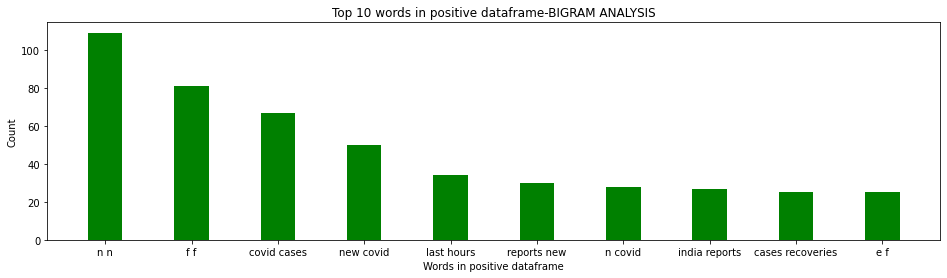

In [484]:
plt.figure(1,figsize=(16,4))

plt.bar(pd1bi,pd2bi, color ='green',width = 0.4)

plt.xlabel("Words in positive dataframe")

plt.ylabel("Count")

plt.title("Top 10 words in positive dataframe-BIGRAM ANALYSIS")

plt.savefig("positive-bigram.png")
plt.show()

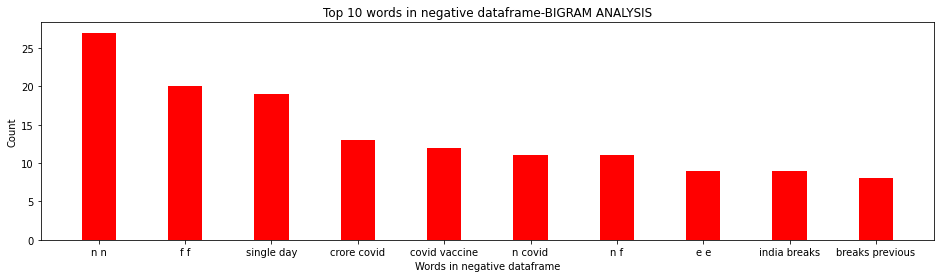

In [485]:
plt.figure(1,figsize=(16,4))
plt.bar(ned1bi,ned2bi, color ='red',
        width = 0.4)
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative dataframe-BIGRAM ANALYSIS")
plt.savefig("negative-bigram.png")
plt.show()

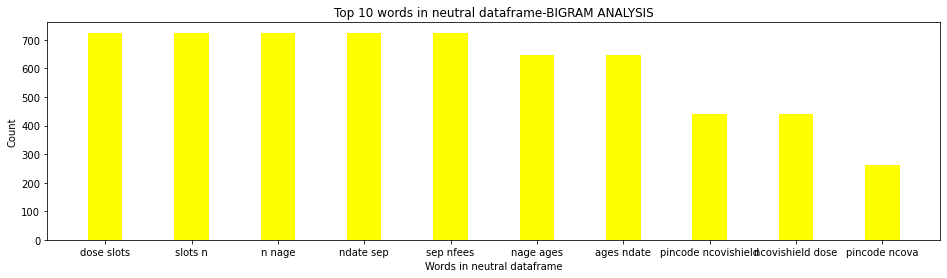

In [486]:
plt.figure(1,figsize=(16,4))
plt.bar(nud1bi,nud2bi, color ='yellow',
        width = 0.4)
plt.xlabel("Words in neutral dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in neutral dataframe-BIGRAM ANALYSIS")
plt.savefig("neutral-bigram.png")
plt.show()

#top 10 bigram neutral | n-grams


In [487]:


positiveValues3=defaultdict(int)
negativeValues3=defaultdict(int)
neutralValues3=defaultdict(int)
#get the count of every word in both the columns of df_train and df_test dataframes

#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
for text in df_train[df_train.sentiment=="positive"].text:
  for word in generate_N_grams(text,3):
    positiveValues3[word]+=1

Sentence after removing stopwords: ['day', 'tweeting', 'replies', 'n', 'n', 'mivscsk', 'ipl', 'arrestpratikgandhi', 'klrahul', 'real', 'withgambhir']
Sentence after removing stopwords: ['amp', 'n', 'islands', 'covid', 'update', 'n', 'n', 'new', 'cases', 'discharged', 'n', 'active', 'cases']
Sentence after removing stopwords: ['last', 'hours', 'new', 'covid', 'cases', 'india', 'higher', 'yesterday']
Sentence after removing stopwords: ['news', 'ncr', 'data', 'crime', 'surge', 'mostly', 'covid', 'violations', 'n', 'covid', 'newsupdates', 'newsalert']
Sentence after removing stopwords: ['india', 'touring', 'new', 'zealand', 'later', 'year', 'due', 'packed', 'calendar', 'amp', 'covid', 'related', 'restrictions']
Sentence after removing stopwords: ['covid', 'might', 'multiple', 'animal', 'origins', 'finds', 'new', 'study', 'n']
Sentence after removing stopwords: ['spectacular', 'real', 'time', 'updated', 'website', 'covid', 'vaccination', 'count', 'check', 'cowin', 'website', 'nlin']
Sentenc

Sentence after removing stopwords: ['tamil', 'nadu', 'thursday', 'logged', 'new', 'coronavirus', 'cases', 'taking', 'overall', 'caseload']
Sentence after removing stopwords: ['want', 'die', 'cancer', 'smoking', 'right', 'smoking', 'around']
Sentence after removing stopwords: ['depending', 'mask', 'worn', 'mask', 'maintained', 'one', 'easily', 'tell', 'much', 'shits', 'pers']
Sentence after removing stopwords: ['indiafightscorona', 'n', 'n', 'f', 'f', 'cleanliness', 'n', 'f', 'f', 'vaccination', 'n', 'f', 'f', 'strictness', 'nwill', 'help', 'win', 'fight', 'covid']
Sentence after removing stopwords: ['perfect', 'breakout', 'today', 'n', 'ngoing', 'massive', 'speed', 'n', 'nstock', 'nno', 'n', 'nindia', 'vaccination', 'f', 'f', 'f', 'n', 'nmore', 'cr', 'vacc']
Sentence after removing stopwords: ['assam', 'reports', 'new', 'covid', 'cases', 'positivity', 'rate', 'dips', 'n', 'covid', 'assamcovidupdate', 'assam']
Sentence after removing stopwords: ['ravi', 'shastri', 'need', 'undergo', 'fi

Sentence after removing stopwords: ['covid', 'undone', 'much', 'progress', 'made', 'latinamerica', 'caribbean', 'countries', 'education']
Sentence after removing stopwords: ['odisha', 'records', 'new', 'covid', 'cases', 'n', 'n', 'odisha', 'odishanews', 'covid', 'corona', 'covidpandemic', 'covidsituation']
Sentence after removing stopwords: ['india', 'crosses', 'landmark', 'cr', 'covid', 'vaccination', 'pm', 'set', 'cross', 'cr', 'day', 'mark', 'special', 'drive']
Sentence after removing stopwords: ['crore', 'indians', 'got', 'covid', 'vaccination', 'hours', 'st', 'birthday', 'modi', 'best', 'tribute', 'gift']
Sentence after removing stopwords: ['covid', 'vaccinationdrive', 'n', 'link', 'parliament', 'report', 'action']
Sentence after removing stopwords: ['fight', 'corona', 'vr', 'available', 'n', 'ue', 'unrealengine', 'indiedev', 'gamer', 'indiegamedev', 'indiegames']
Sentence after removing stopwords: ['covid', 'n', 'net', 'scare', 'story', 'many', 'pregnant', 'women', 'likely', 'cov

Sentence after removing stopwords: ['calling', 'morning', 'remind', 'glowing', 'healthy', 'skin', 'f', 'f', 'nwho', 'gonna', 'pick', 'call', 'n', 'nshop']
Sentence after removing stopwords: ['assam', 'amch', 'principal', 'tested', 'positive', 'airlifted', 'guwahati', 'condition', 'deteriorates', 'n', 'n', 'northeasttoday']
Sentence after removing stopwords: ['fight', 'corona', 'vr', 'available', 'n', 'ue', 'unrealengine', 'indiedev', 'gamer', 'indiegamedev', 'indiegames']
Sentence after removing stopwords: ['covid', 'jabs', 'minute', 'india', 'today', 'n', 'nalready', 'one', 'crore', 'vaccination', 'far', 'today', 'till', 'pm', 'n', 'n', 'narendramodi']
Sentence after removing stopwords: ['hospitals', 'kolkata', 'increasing', 'covid', 'beds', 'cater', 'fresh', 'rise', 'number', 'patients', 'covid', 'mykolkata']
Sentence after removing stopwords: ['defeated', 'covid', 'without', 'vaccine', 'nhow', 'nafter', 'many', 'deaths', 'defeated']
Sentence after removing stopwords: ['new', 'covid'

Sentence after removing stopwords: ['india', 'reports', 'new', 'covid', 'cases', 'deaths', 'last', 'hours', 'n', 'n', 'covid']
Sentence after removing stopwords: ['covid', 'punja', 'starts', 'first', 'genomesequencing', 'facility', 'patiala', 'la', 'n', 'n', 'punjabnews', 'n', 'covid']
Sentence after removing stopwords: ['icymi', 'f', 'f', 'beginning', 'third', 'wave', 'fresh', 'covid', 'cases', 'drastically', 'rising', 'kerala', 'maharashtra', 'f', 'f', 'n', 'nfull', 'story']
Sentence after removing stopwords: ['crore', 'doses', 'day', 'great', 'achivement', 'milestone', 'world', 'record', 'congrats', 'team', 'india', 'covid', 'vaccination']
Sentence after removing stopwords: ['another', 'e', 'mple', 'consequences', 'pandemic', 'beyond', 'obvious', 'health', 'economic', 'effects']
Sentence after removing stopwords: ['covid', 'even', 'longcovid', 'huge', 'problem', 'overwhelming', 'majority', 'children', 'infec']
Sentence after removing stopwords: ['free', 'n', 'npincode', 'ncova', 'n'

Sentence after removing stopwords: ['huge', 'n', 'na', 'doctor', 'owner', 'diagnostic', 'la', 'found', 'times', 'increase', 'cancers', 'covid']
Sentence after removing stopwords: ['research', 'surveillance', 'pivotal', 'address', 'covid', 'epidemics', 'n', 'nicge', 'nicolae', 'testemitanu', 'unive']
Sentence after removing stopwords: ['urvashi', 'rautela', 'leaves', 'fans', 'mesmerized', 'rs', 'crore', 'worth', 'diamond', 'studded', 'mask', 'n', 'diamond', 'mask']
Sentence after removing stopwords: ['got', 'shots', 'great', 'please', 'stay', 'home', 'high', 'vaccination', 'rates', 'may', 'passport', 'economic', 'reopening']
Sentence after removing stopwords: ['good', 'morning', 'front', 'page', 'telegraph', 'n', 'nread']
Sentence after removing stopwords: ['hoping', 'many', 'birthday', 'days', 'ahead', 'entire', 'population', 'gets', 'vaccinated', 'n', 'n', 'vaccinemandate']
Sentence after removing stopwords: ['cyclolsavam', 'online', 'international', 'bicycle', 'cultural', 'festival',

Sentence after removing stopwords: ['free', 'n', 'npincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ages']
Sentence after removing stopwords: ['vitamin', 'deficiency', 'hypovitaminosis', 'defined', 'vitamin', 'level', 'normal', 'diabetes']
Sentence after removing stopwords: ['india', 'sunday', 'reported', 'new', 'covid', 'cases', 'new', 'deaths', 'data', 'published', 'ministry', 'health']
Sentence after removing stopwords: ['celebrated', 'birthday', 'facilitating', 'mega', 'covid', 'vaccination', 'drive', 'across', 'cou']
Sentence after removing stopwords: ['india', 'fight', 'covid', 'covidvaccine', 'akin', 'revolution', 'thanks', 'brillia']
Sentence after removing stopwords: ['happy', 'sunday', 'n', 'veerandrasingh', 'hollywood', 'investors', 'producers', 'actors', 'director', 'models', 'fitness', 'actingheadshot']
Sentence after removing stopwords: ['india', 'reports', 'new', 'covid', 'cases', 'recoveries', 'last', 'hours', 'per', 'union', 'health', 'ministry']
Sentence after r

Sentence after removing stopwords: ['keep', 'safe', 'coronavirus', 'make', 'sms', 'habit', 'n', 'n', 'wash', 'hands', 'soap', 'n', 'wear', 'mask']
Sentence after removing stopwords: ['punnagai', 'mannan', 'theme', 'n', 'nuse', 'earphones', 'better', 'e', 'erience', 'n', 'nmovie', 'punnagai', 'mannan', 'ncomposer', 'ilayaraja', 'n', 'n', 'cov']
Sentence after removing stopwords: ['proud', 'movement', 'citizens', 'belagavi', 'nthanks', 'n', 'n', 'n', 'n', 'n', 'n', 'n']
Sentence after removing stopwords: ['f', 'kindly', 'wearamask', 'n', 'safekovai']
Sentence after removing stopwords: ['long', 'time', 'came', 'airport', 'nflying', 'ahmedabad', 'n', 'nwear', 'mask', 'stay', 'safe', 'n', 'covid']
Sentence after removing stopwords: ['people', 'testing', 'positive', 'covid', 'india', 'active', 'cases', 'stand', 'according', 'uni']
Sentence after removing stopwords: ['africa', 'faces', 'million', 'covid', 'vaccine', 'shortfall', 'year', 'indiablooms', 'first', 'portal', 'digital', 'news', 'ma

Sentence after removing stopwords: ['good', 'f', 'f', 'f', 'n', 'napart', 'jokes', 'n', 'nkeep', 'sanitized', 'always', 'use', 'mask', 'social', 'distance']
Sentence after removing stopwords: ['india', 'crosses', 'landmark', 'crore', 'covid', 'vaccinations', 'pm', 'set', 'cross', 'crore', 'day', 'mark', 'special']
Sentence after removing stopwords: ['fight', 'corona', 'vr', 'available', 'n', 'ue', 'unrealengine', 'indiedev', 'gamer', 'indiegamedev', 'indiegames']
Sentence after removing stopwords: ['covid', 'un', 'secretary', 'general', 'says', 'bar', 'unvaccinated', 'heads', 'state', 'general', 'assembly']
Sentence after removing stopwords: ['f', 'kerala', 'reports', 'fresh', 'covid', 'infections', 'recoveries', 'deaths', 'today', 'n', 'nactive', 'cases']
Sentence after removing stopwords: ['join', 'space', 'largestvaccinedrive', 'n', 'appeals', 'eligible', 'people', 'cachar', 'take', 'first', 'second', 'dose']
Sentence after removing stopwords: ['better', 'future', 'n', 'n', 'n', 'n'

In [488]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="negative"
for text in df_train[df_train.sentiment=="negative"].text:
  for word in generate_N_grams(text,3):
    negativeValues3[word]+=1

Sentence after removing stopwords: ['fate', 'children', 'seen', 'secondary', 'needs', 'adults', 'material', 'non', 'material', 'needs']
Sentence after removing stopwords: ['covid', 'third', 'wave', 'devastating', 'second', 'new', 'variant', 'says', 'top', 'virologist', 'gagandeep', 'kan']
Sentence after removing stopwords: ['cucumber', 'face', 'mask', 'dry', 'skin', 'e', 'apply', 'e', 'e', 'f', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'facemask', 'radhiradhikha', 'beautytips']
Sentence after removing stopwords: ['long', 'time', 'comprehensive', 'thread', 'covidvaccine', 'situation', 'make']
Sentence after removing stopwords: ['supreme', 'court', 'hearing', 'plea', 'seeking', 'compensation', 'illegal', 'detention', 'underwent', 'manipur', 'based', 'political', 'activ']
Sentence after removing stopwords: ['bhavani', 'rv', 'prolonged', 'period', 'school', 'closure', 'amp', 'restrained', 'group', 'e', 'hange', 'interaction', 'amp', 'play', 'due']
Sentence after removing stopwords: ['losses'

Sentence after removing stopwords: ['fate', 'children', 'seen', 'secondary', 'needs', 'adults', 'material', 'non', 'material', 'needs']
Sentence after removing stopwords: ['hate', 'dangerous', 'virus', 'covid', 'pandemic', 'stop', 'islamophobia']
Sentence after removing stopwords: ['found', 'among', 'hindus', 'muslims', 'thought', 'person', 'found', 'selfish', 'ones', 'got', 'thanks', 'p']
Sentence after removing stopwords: ['sonu', 'sood', 'help', 'covid', 'ppl', 'probe', 'hc', 'order', 'giving', 'vaccines', 'illegally', 'nkerjiwal', 'said', 'govt', 'inti']
Sentence after removing stopwords: ['world', 'triathlon', 'sprint', 'relay', 'championships', 'bermuda', 'cancelled', 'due', 'covid', 'n', 'nread']
Sentence after removing stopwords: ['cases', 'slightly', 'upward', 'n', 'cova', 'n', 'coronapas', 'covidisnotover', 'maskup']
Sentence after removing stopwords: ['india', 'breaks', 'previous', 'vaccination', 'records', 'n', 'nunder', 'pm', 'shri', 'ji', 'today', 'crore', 'covid', 'va']


Sentence after removing stopwords: ['india', 'adds', 'covid', 'cases', 'active', 'cases', 'decline', 'govt', 'n', 'coronavirusupdates', 'activecases']
Sentence after removing stopwords: ['covid', 'africa', 'active', 'cases', 'deaths', 'n', 'nfind']
Sentence after removing stopwords: ['sonu', 'sood', 'ostentatious', 'pr', 'campaign', 'covid', 'mere', 'strategy', 'evade', 'legal', 'action', 'n', 'nthe', 'fa', 'ade']
Sentence after removing stopwords: ['coronavirus', 'common', 'covid', 'symptoms', 'recorded', 'vaccination', 'n', 'n', 'health', 'healthtips', 'covid', 'covid']
Sentence after removing stopwords: ['india', 'adds', 'covid', 'cases', 'active', 'cases', 'decline', 'n', 'n', 'click', 'f']
Sentence after removing stopwords: ['newsalert', 'india', 'breaks', 'single', 'day', 'covid', 'vaccination', 'record', 'crosses', 'crore', 'pm', 'birthday']
Sentence after removing stopwords: ['meanwhile', 'usa', 'deep', 'red', 'worst', 'situation', 'n', 'n', 'covid']
Sentence after removing sto

In [489]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="neutral"
for text in df_train[df_train.sentiment=="neutral"].text:
  for word in generate_N_grams(text,3):
    neutralValues3[word]+=1#focus on more frequently occuring words for every sentiment=>
#sort in DO wrt 2nd column in each of positiveValues,negativeValues and neutralValues

Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nvivekanan']
Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'npan', 'nagar']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nmga', 'hospi']
Sentence after removing stopwords: ['taliban', 'terrorist', 'covid', 'n', 'mask', 'burkha', 'compulsary', 'n', 'home', 'isolation', 'n', 'spread', 'come', 'contact', 'n', 'kills']
Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nnano', 'hospi']
Sentence after removing stopwords: ['covid', 'cr', 'vaccine', 'doses', 'provided', 'states', 'uts', 'n']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ndate', 'sep', 'nfees', 'nunited', 'hospital', 'jayana']
S

Sentence after removing stopwords: ['aai', 'coimbatore', 'international', 'airport', 'n', 'n', 'n', 'update', 'arrival', 'departure', 'flight', 'schedule']
Sentence after removing stopwords: ['sep', 'maharashtra', 'covid', 'update', 'n', 'nactive', 'cases', 'f', 'n', 'nconfirmed', 'f', 'nrecovered', 'f', 'c']
Sentence after removing stopwords: ['world', 'f', 'c', 'covid', 'vaccination', 'update', 'n', 'ntotal', 'doses', 'n', 'n', 'f', 'f', 'f', 'n', 'nchina', 'f', 'f', 'nindia', 'f', 'e', 'f']
Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nnu', 'hospital']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nhamilton']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nspringle']
Sentence after removing stopwords: ['congratulations', 'india', 'f', 'e', 'f', 'n'

Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'napollo', 'cr']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'napollo', 'cm']
Sentence after removing stopwords: ['covid', 'update', 'cuttack', 'district', 'nnew', 'cases', 'reported', 'ncmc', 'nrural', 'amp', 'ulbs', 'nother']
Sentence after removing stopwords: ['look', 'milestone', 'n', 'nwhat', 'achieve', 'one', 'day', 'n', 'congratulationsindia', 'n', 'n', 'covid', 'covid', 'vaccination', 'cowin']
Sentence after removing stopwords: ['pincode', 'nsputnik', 'v', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nmiracle', 'h']
Sentence after removing stopwords: ['still', 'going', 'modihaitohmumkinhai', 'vaccinationdrive', 'india', 'covid']
Sentence after removing stopwords: ['sudden', 'surge', 'covid', 'cases', 'nagpur', 'district', 'covid', 'doubledigits']
Sentence a

Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nr', 'x', 'whi']
Sentence after removing stopwords: ['power', 'shutdown', 'areas', 'chennai', 'sept', 'chennai', 'powershutdown', 'powercut', 'atzone', 'covid']
Sentence after removing stopwords: ['children', 'living', 'conflict', 'zones', 'face', 'double', 'threat', 'covid', 'pandemic', 'simultaneous']
Sentence after removing stopwords: ['hope', 'n', 'n', 'covid', 'covidvaccine', 'n']
Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ndate', 'sep', 'nfees', 'nsuguna', 'hospital', 'west', 'b']
Sentence after removing stopwords: ['breaking', 'crores', 'vaccines', 'doses', 'counting', 'n', 'covid']
Sentence after removing stopwords: ['world', 'largestvaccinedrive', 'breaking', 'records', 'strengthening', 'india', 'fight', 'covid', 'n', 'n', 'f', 'crore', 'people', 'vacc']
Sentence after removing stopwords: ['pincode', 'nco

Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'ndigvish', 'hos']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nprolife']
Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'ngvg', 'invivo']
Sentence after removing stopwords: ['bank', 'manager', 'operations', 'manager', 'along', 'two', 'employees', 'involved', 'n', 'n', 'n', 'n', 'bankmanager', 'employees']
Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nr', 'x', 'samanv']
Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'naarthi', 'scan']
Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees

Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nr', 'x', 'siddap']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'npadmashre']
Sentence after removing stopwords: ['gurudwara', 'hemkunt', 'sahi', 'yatra', 'begin', 'uttarakhand', 'september', 'devotees', 'allowed', 'darshan']
Sentence after removing stopwords: ['covid', 'people', 'u', 'may', 'eligible', 'pfizer', 'eua', 'booster', 'dose', 'eua', 'approved', 'till']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nsparsh', 'h']
Sentence after removing stopwords: ['india', 'cumulative', 'covid', 'vaccination', 'coverage', 'crosses', 'landmark', 'crore', 'n', 'nmore', 'lakh', 'doses', 'admini']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', '

Sentence after removing stopwords: ['covid', 'inspires', 'patients', 'says', 'precautions', 'need', 'taken', 'though', 'avoid', 'wearing', 'mask', 'talk']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nnarayana']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nadd', 'sc']
Sentence after removing stopwords: ['sunteck', 'realty', 'plans', 'jda', 'develop', 'million', 'sq', 'ft', 'shahad', 'n', 'nread']
Sentence after removing stopwords: ['travel', 'villages', 'please', 'find', 'vaccinationdrive', 'covid', 'whether', 'villa']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'ngreenview']
Sentence after removing stopwords: ['learn', 'solarsytem', 'publish', 'application', 'ios', 'android', 'augmentedreality', 'feature', 'n', 'ncheckout']
Sentence after removi

Sentence after removing stopwords: ['finally', 'record', 'cr', 'people', 'vaccinated', 'today', 'ncongratulations', 'india', 'n', 'covid', 'n', 'vaccinationdrive']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'npathway']
Sentence after removing stopwords: ['bangla', 'sahi', 'gurdwara', 'delhi', 'shut', 'visitors', 'violation', 'covid', 'protocols', 'delhi', 'banglasahibgurdwara']
Sentence after removing stopwords: ['aai', 'airports', 'southern', 'region', 'india', 'regaining', 'confidence', 'flyers', 'th', 'september']
Sentence after removing stopwords: ['manufacturing', 'thought', 'l', 'eader', 'quality', 'consultant', 'chief', 'startup', 'advisory', 'lators', 'saravjit', 'singh', 'wri']
Sentence after removing stopwords: ['indiainflation', 'path', 'shifting', 'favourably', 'hoped', 'rbi', 'n', 'indianeconomy', 'foodprices', 'fuelprice']
Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 

Sentence after removing stopwords: ['vaccinating', 'children', 'covid']
Sentence after removing stopwords: ['today', 'sarvodaya', 'bal', 'vidyalaya', 'ashok', 'nagar', 'delhi', 'electricity', 'problem', 'yesterday']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nst', 'martha']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ndate', 'sep', 'nfees', 'nkauvery', 'hospital', 'e', 'city']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'ndigvish', 'h']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nadd', 'sc']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'ngreenview']
Sentence after removing stopwords: ['hyderabad', 'surgery', 'n', 'nr

Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nr', 'x', 'sid']
Sentence after removing stopwords: ['former', 'union', 'minister', 'slammed', 'asking', 'party', 'waited', 'till', 'prime', 'minister']
Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nspringleaf']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nmallige']
Sentence after removing stopwords: ['dist', 'level', 'officials', 'directed', 'keep', 'phones', 'switched', 'e', 'ept', 'cases', 'emergency', 'otherwis']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ndate', 'sep', 'nfees', 'nshankar', 'specialty', 'hospi']
Sentence after removing stopwords: ['key', 'findings', 'fifth', 'sero', 'survey', 'conducted', 'bmc', 'jurisdiction', 'area', 'announced', '

Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nmga', 'hosp']
Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'naltius', 'hosp']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nmallige']
Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nspringleaf']
Sentence after removing stopwords: ['massive', 'crore', 'doses', 'vaccine', 'administered', 'today', 'number', 'still', 'increa']
Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nmotherhood']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nmilann', 'ho']
Sentence after removing stopw

Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nst', 'marth']
Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'ncare', 'cu']
Sentence after removing stopwords: ['cautious', 'pandemic', 'yet', 'n', 'nfollow', 'safety', 'rules', 'guidelines', 'ensure', 'safety', 'offices', 'graduall']
Sentence after removing stopwords: ['billion', 'covid', 'vaccine', 'doses', 'administered', 'affiliated', 'south', 'east', 'asian', 'countries', 'india', 'ha']
Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ndate', 'sep', 'nfees', 'nsuguna', 'hospital', 'west', 'b']
Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nez', 'aarthi']
Sentence after removing stopwords: ['covid', 'pandemic', 'disrupted', 'lives', 'livelihoods', 'series', 'ess

Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'napollo', 'ho']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ndate', 'sep', 'nfees', 'nrainbow', 'royal', 'meenakshi']
Sentence after removing stopwords: ['india', 'continues', 'largest', 'vaccine', 'drive', 'world', 'let', 'us', 'remain', 'vigilant', 'continue', 'wear', 'masks']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nmotherhoo']
Sentence after removing stopwords: ['pincode', 'nsputnik', 'v', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'ntenet', 'dia']
Sentence after removing stopwords: ['people', 'ask', 'sanjay', 'jha', 'modifactordecoded', 'shut', 'walk', 'amp', 'never', 'indulge']
Sentence after removing stopwords: ['covid', 'world', 'f', 'c', 'echart', 'n', 'nworld', 'f', 'c', 'dtotal', 'ncases', 'ndeath',

Sentence after removing stopwords: ['rise', 'people', 'odisha', 'thank', 'hon', 'ble', 'odisha', 'shri', 'odisha', 'ji', 'reaching', 'mileston']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nmilann', 'ho']
Sentence after removing stopwords: ['westbengal', 'kolkata', 'states', 'india', 'fever', 'child', 'se']
Sentence after removing stopwords: ['occasion', 'hon', 'ble', 'pm', 'sh', 'ji', 'birthday', 'tripura', 'state', 'doctors', 'cell', 'along']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nsparsh', 'h']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ndate', 'sep', 'nfees', 'nkauvery', 'hospital', 'e', 'city']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ndate', 'sep', 'nfees', 'nsakra', 'world', 'hospital', 'w']
Sentence after removi

Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nmotherho']
Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'napollo', 'cli']
Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nr', 'x', 'white']
Sentence after removing stopwords: ['india', 'administers', 'record', 'cr', 'covid', 'vaccine', 'doses', 'today', 'mandaviya', 'says', 'gift', 'pm', 'modi', 'birthday', 'n', 'n', 'covid']
Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nr', 'x', 'samanv']
Sentence after removing stopwords: ['pincode', 'nsputnik', 'v', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'ntenet', 'dia']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages',

Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nshree', 'man']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nadd', 'sc']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nhealing', 'h']
Sentence after removing stopwords: ['appro', 'mately', 'total', 'population', 'age', 'seychelles', 'striving', 'provide', 'futu']
Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'napollo', 'cm', 'f']
Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'napollo', 'cli']
Sentence after removing stopwords: ['pincode', 'nsputnik', 'v', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'naddresshe']
Sentence after rem

Sentence after removing stopwords: ['make', 'life', 'changing', 'decisions', 'shower', 'forget', 'wearing', 'clothes', 'n', 'n', 'covid', 'memes', 'trendingnow', 'saturdaythoughts']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nsri', 'krish']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nshobha', 'ho']
Sentence after removing stopwords: ['covid', 'alaska', 'highest', 'vaccination', 'rate', 'covid', 'crisis', 'vacc']
Sentence after removing stopwords: ['doubt', 'remember', 'everyone', 'doubt', 'seeing', 'similarity', 'remove', 'fear']
Sentence after removing stopwords: ['saw', 'nation', 'kept', 'looking', 'cowin', 'dashboard', 'yesterday', 'covid']
Sentence after removing stopwords: ['strict', 'covid', 'rules', 'fans', 'entry', 'uae', 'stadiums', 'ipl', 'n', 'nthose', 'allowed', 'inside', 'sharjah', 'st']
Sentence after removin

Sentence after removing stopwords: ['heroes', 'heroes', 'teacher', 'tribal', 'easternindia', 'physicaldistance', 'covid', 'pandemic', 'remotelearning', 'children']
Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'naltius', 'hosp']
Sentence after removing stopwords: ['tamilnadu', 'covid', 'sep', 'n', 'ntoday', 'total', 'nactive', 'cases', 'ndischarged', 'today', 'total']
Sentence after removing stopwords: ['cuba', 'authorised', 'emergency', 'use', 'domestically', 'produced', 'vaccine', 'minors', 'ages', 'two']
Sentence after removing stopwords: ['assamcovidupdate', 'n', 'nmedia', 'bulletin', 'covid', 'assam', 'actions', 'taken']
Sentence after removing stopwords: ['loot', 'nget', 'pharmeasy', 'plus', 'months', 'membership', 'n', 'nvisit', 'membership']
Sentence after removing stopwords: ['australian', 'bureau', 'statistics', 'shows', 'sliding', 'trend', 'jobs', 'australia', 'led', 'pandemic', 'august']
Sentence 

Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nmiracle', 'h']
Sentence after removing stopwords: ['india', 'covid', 'dailyupdate', 'n', 'n', 'posrate', 'f', 'c', 'n', 'newcases', 'f', 'c', 'n', 'deaths', 'f', 'c', 'n', 'n', 'activecases', 'f', 'n', 'n', 'dayavg']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nr', 'x', 'whi']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'ne', 'el', 'car']
Sentence after removing stopwords: ['union', 'health', 'minister', 'mansukh', 'mandaviya', 'inspected', 'covid', 'testing', 'arrangements', 'srinagar', 'airport']
Sentence after removing stopwords: ['pincode', 'ncova', 'n', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'napple', 'hospi']
Sentence after removing stopwords: ['pincode', 'ncovishield', '

Sentence after removing stopwords: ['kids', 'teased', 'bullied', 'shamed', 'body', 'look', 'make', 'kids', 'feel', 'deeply', 'hurt', 'harm']
Sentence after removing stopwords: ['bycycle', 'city', 'f', 'n', 'ahmedabad', 'photooftheday', 'photographer', 'sundayvibes', 'sunghoon', 'lucknow', 'sungchan', 'dslr', 'city', 'night']
Sentence after removing stopwords: ['covid', 'world', 'map', 'assessment', 'countries', 'n', 'nsee']
Sentence after removing stopwords: ['pincode', 'nsputnik', 'v', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nr', 'x', 'whit']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'ncare']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nprashant']
Sentence after removing stopwords: ['bhubaneswar', 'covid', 'cases', 'detected', 'recover', 'n']
Sentence after removing stopwords: ['pincode', 'ncova', '

Sentence after removing stopwords: ['india', 'achieves', 'another', 'crore', 'covid', 'vaccinations', 'today', 'ccongratulation', 'india', 'thank', 'india']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nteatree']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nunity', 'lif']
Sentence after removing stopwords: ['wash', 'hands', 'soap', 'water', 'sanitizers', 'n', 'n', 'staysafe', 'stayhealthy', 'n', 'nalways', 'wear', 'masks', 'amp', 'use', 'sanitize']
Sentence after removing stopwords: ['growth', 'opportunities', 'latent', 'adjacency', 'automotive', 'ambient', 'lighting', 'market', 'n', 'nview', 'detail', 'toc']
Sentence after removing stopwords: ['pincode', 'ncovishield', 'dose', 'slots', 'n', 'nage', 'ages', 'ndate', 'sep', 'nfees', 'nr', 'x', 'sid']
Sentence after removing stopwords: ['congratulations', 'india', 'administerin

In [490]:
df_positive3=pd.DataFrame(sorted(positiveValues3.items(),key=lambda x:x[1],reverse=True))
df_negative3=pd.DataFrame(sorted(negativeValues3.items(),key=lambda x:x[1],reverse=True))
df_neutral3=pd.DataFrame(sorted(neutralValues3.items(),key=lambda x:x[1],reverse=True))

In [491]:
pd1tri=df_positive3[0][:10]
pd2tri=df_positive3[1][:10]

In [492]:
ned1tri=df_negative3[0][:10]
ned2tri=df_negative3[1][:10]

In [493]:
nud1tri=df_neutral3[0][:10]
nud2tri=df_neutral3[1][:10]

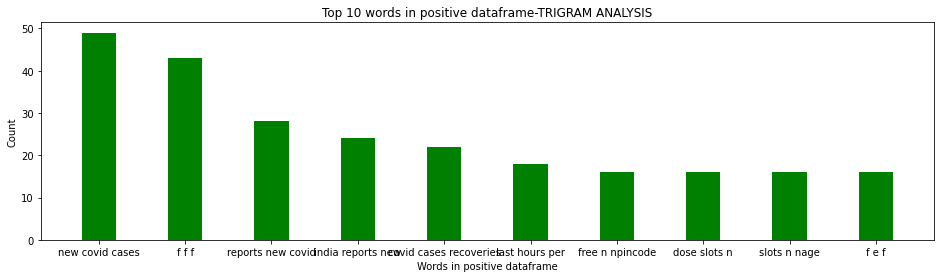

In [494]:
plt.figure(1,figsize=(16,4))
plt.bar(pd1tri,pd2tri, color ='green',
        width = 0.4)
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive dataframe-TRIGRAM ANALYSIS")
plt.savefig("positive-trigram.png")

plt.show()

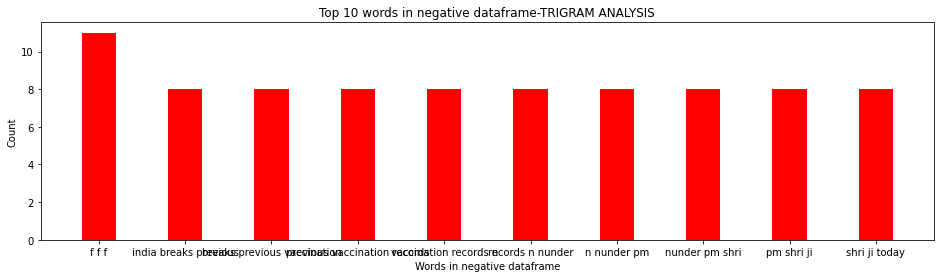

In [495]:
plt.figure(1,figsize=(16,4))
plt.bar(ned1tri,ned2tri, color ='red',
        width = 0.4) 
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative dataframe-TRIGRAM ANALYSIS")
plt.savefig("negative-trigram.png")
plt.show()

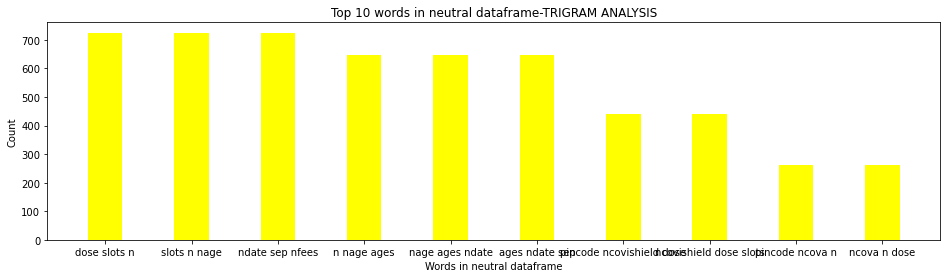

In [496]:
plt.figure(1,figsize=(16,4))
plt.bar(nud1tri,nud2tri, color ='yellow',
        width = 0.4) 
plt.xlabel("Words in neutral dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in neutral dataframe-TRIGRAM ANALYSIS")
plt.savefig("neutral-trigram.png")
plt.show()

In [560]:
import csv
pp= (r"C:\Users\DELL\Desktop\mask covid19\mask dataset\INDIAMASKsentimentpythonclassification.csv")
names = ['created_at','text','screen_name','location','sentiment','polarity']
dataset1 = pd.read_csv(pp,names=names)
dataset1.head()

,created_at,text,screen_name,location,sentiment,polarity
0,19-09-2021 06:25,loot nget pharmeasy plus months membership re ...,b'on9deals',"b'Mumbai, India'",neutral,0.000
1,19-09-2021 04:45,jpr face mask still mandatory private car full...,b'mrinaljaipur',"b'Jaipur, India'",neutral,0.000
2,19-09-2021 04:22,don t let guard covid third wave e ected make ...,b'MayaSharmaNDTV',"b'Bengaluru, India'",neutral,0.000
3,18-09-2021 12:45,using mask getting vaccinated unlock chances g...,b'DoITCRaj',"b'Jaipur, India'",positive,0.450
4,18-09-2021 08:28,average people see inside hospital public plac...,b'sajanjohn',"b'Bengaluru, India'",negative,-0.075


In [562]:
clo=['created_at','text','screen_name','location', 'polarity','sentiment']
dataset3=dataset1.reindex(columns=clo)
dataset3.head()

,created_at,text,screen_name,location,polarity,sentiment
0,19-09-2021 06:25,loot nget pharmeasy plus months membership re ...,b'on9deals',"b'Mumbai, India'",0.000,neutral
1,19-09-2021 04:45,jpr face mask still mandatory private car full...,b'mrinaljaipur',"b'Jaipur, India'",0.000,neutral
2,19-09-2021 04:22,don t let guard covid third wave e ected make ...,b'MayaSharmaNDTV',"b'Bengaluru, India'",0.000,neutral
3,18-09-2021 12:45,using mask getting vaccinated unlock chances g...,b'DoITCRaj',"b'Jaipur, India'",0.450,positive
4,18-09-2021 08:28,average people see inside hospital public plac...,b'sajanjohn',"b'Bengaluru, India'",-0.075,negative


In [570]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from collections import Counter
from sklearn.svm import SVC
array = dataset3.values
X = array[:,0:5]
y = array[:,5]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

y


array(['neutral', 'neutral', 'neutral', ..., 'positive', 'neutral',
       'neutral'], dtype=object)

In [571]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
models

[('LR', LogisticRegression(multi_class='ovr', solver='liblinear')),
 ('LDA', LinearDiscriminantAnalysis()),
 ('KNN', KNeighborsClassifier()),
 ('CART', DecisionTreeClassifier()),
 ('NB', GaussianNB()),
 ('SVM', SVC(gamma='auto'))]

In [572]:
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: nan (nan)
LDA: nan (nan)
KNN: nan (nan)
CART: nan (nan)
NB: nan (nan)
SVM: nan (nan)
